# Capstone Project - Used Car Price Prediction
## MIT Applied Data Science Program - Kevin Goh

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, train_test_split

import warnings
warnings.filterwarnings('ignore')

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler

# 1. Exploratory Data Analysis and Data Preparation

In [2]:
data = pd.read_csv('used_cars.csv')

In [3]:
data.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74


In [4]:
data.tail()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,103.6,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.6,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,63.1,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.6,5.0,NaN,NaN
7252,7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.00,2148.0,170.0,5.0,NaN,NaN


In [5]:
data.shape

(7253, 14)

In [6]:
data = data.drop(['S.No.'], axis=1)

In [7]:
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   float64
 8   Engine             7207 non-null   float64
 9   Power              7078 non-null   float64
 10  Seats              7200 non-null   float64
 11  New_price          1006 non-null   float64
 12  Price              6019 non-null   float64
dtypes: float64(6), int64(2), object(5)
memory usage: 736.8+ KB


In [9]:
data.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_price            6247
Price                1234
dtype: int64

**EDA Observations (Part 1)**
- **Missing Values**: New_price and Price have many missing values
- **Other variables with missing values**: mileage, engine, power, seats
- **Data Types**: All columns have correct data types

In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7253.0,2013.365366,3.254421,1996.00,2011.000,2014.00,2016.0000,2019.00
Kilometers_Driven,7253.0,58699.063146,84427.720583,171.00,34000.000,53416.00,73000.0000,6500000.00
Mileage,7251.0,18.141580,4.562197,0.00,15.170,18.16,21.1000,33.54
Engine,7207.0,1616.573470,595.285137,72.00,1198.000,1493.00,1968.0000,5998.00
Power,7078.0,112.765214,53.493553,34.20,75.000,94.00,138.1000,616.00
Seats,7200.0,5.280417,0.809277,2.00,5.000,5.00,5.0000,10.00
New_price,1006.0,22.779692,27.759344,3.91,7.885,11.57,26.0425,375.00
Price,6019.0,9.479468,11.187917,0.44,3.500,5.64,9.9500,160.00


**EDA Observations (Part 2)**
- **Year**: no issue with the range of years
- **Kilometers_Driven**: extreme maximum value of 6.5 million km
- **Mileage**: possible error for mileage 0.0
- **Engine**: will need to check on the minimum engine size of 72
- **Power**: range of values looks right
- **Seats**: number of seats looks right. There is a 10-seater car which seems quite high.
- **New_price**: median and mean is higher than price which is expected

In [11]:
data.describe(include=['object'])

,Name,Location,Fuel_Type,Transmission,Owner_Type
count,7253,7253,7253,7253,7253
unique,2041,11,5,2,4
top,Mahindra XUV500 W8 2WD,Mumbai,Diesel,Manual,First
freq,55,949,3852,5204,5952


In [12]:
cat_cols = data.select_dtypes(include=['object']).columns

for column in cat_cols:
    print("For column:", column)
    print(data[column].value_counts())
    print('-'*50)

For column: Name
Mahindra XUV500 W8 2WD                  55
Maruti Swift VDI                        49
Maruti Swift Dzire VDI                  42
Honda City 1.5 S MT                     39
Maruti Swift VDI BSIV                   37
                                        ..
Chevrolet Beat LT Option                 1
Skoda Rapid 1.6 MPI AT Elegance Plus     1
Ford EcoSport 1.5 TDCi Ambiente          1
Hyundai i10 Magna 1.1 iTech SE           1
Hyundai Elite i20 Magna Plus             1
Name: Name, Length: 2041, dtype: int64
--------------------------------------------------
For column: Location
Mumbai        949
Hyderabad     876
Coimbatore    772
Kochi         772
Pune          765
Delhi         660
Kolkata       654
Chennai       591
Jaipur        499
Bangalore     440
Ahmedabad     275
Name: Location, dtype: int64
--------------------------------------------------
For column: Fuel_Type
Diesel      3852
Petrol      3325
CNG           62
LPG           12
Electric       2
Name: Fuel_Typ

**Observations (Part 3)**
- **Cars**: There are 2041 total unique cars. The top three are: Mahindra XUV500 W8 2WD, Maruti Swift VDI and Maruti Swift Dzire VDI.
- **Locations**: There are 11 total unique locations. The top three are: Mumbai, Hyderabad and Coimbatore.
- **Fuel_Type**: There are 5 fuel  types. We can consider dropping 'electric' since there are only 2 data points.
- **Transmission**: There are 2 transmission types: manual and automatic.
- **Owner_Type**: There are 5 total owner types, and most cars are from first owners.

In [13]:
data.sort_values(by=["Kilometers_Driven"], ascending=False).head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
2328,BMW X5 xDrive 30d M Sport,Chennai,2017,6500000,Diesel,Automatic,First,15.97,2993.0,258.00,5.0,NaN,65.00
340,Skoda Octavia Ambition Plus 2.0 TDI AT,Kolkata,2013,775000,Diesel,Automatic,First,19.30,1968.0,141.00,5.0,NaN,7.50
1860,Volkswagen Vento Diesel Highline,Chennai,2013,720000,Diesel,Manual,First,20.54,1598.0,103.60,5.0,NaN,5.90
358,Hyundai i10 Magna 1.2,Chennai,2009,620000,Petrol,Manual,First,20.36,1197.0,78.90,5.0,NaN,2.70
2823,Volkswagen Jetta 2013-2015 2.0L TDI Highline AT,Chennai,2015,480000,Diesel,Automatic,First,16.96,1968.0,138.03,5.0,NaN,13.00
3092,Honda City i VTEC SV,Kolkata,2015,480000,Petrol,Manual,First,17.40,1497.0,117.30,5.0,NaN,5.00
4491,Hyundai i20 Magna Optional 1.2,Bangalore,2013,445000,Petrol,Manual,First,18.50,1197.0,82.90,5.0,NaN,4.45
6921,Maruti Swift Dzire Tour LDI,Jaipur,2012,350000,Diesel,Manual,First,23.40,1248.0,74.00,5.0,NaN,NaN
3649,Tata Indigo LS,Jaipur,2008,300000,Diesel,Manual,First,17.00,1405.0,70.00,5.0,NaN,1.00
1528,Toyota Innova 2.5 G (Diesel) 8 Seater BS IV,Hyderabad,2005,299322,Diesel,Manual,First,12.80,2494.0,102.00,8.0,NaN,4.00


**Observations (Part 4)**
- There is an outlier for 2328 as it is unlikely that kilometers driven reach 6.5 million km
- Row 2328 will be dropped

In [14]:
data.drop(2328,inplace=True)

In [15]:
data.sort_values(by=["Kilometers_Driven"], ascending=True).head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
1361,Maruti Alto 800 2016-2019 VXI,Mumbai,2019,171,Petrol,Manual,First,24.70,796.0,47.30,5.0,NaN,3.60
5606,Maruti Wagon R ZXI AMT 1.2,Mumbai,2019,600,Petrol,Automatic,First,21.50,1197.0,81.80,5.0,6.80,6.25
5339,Hyundai i20 Active SX Dual Tone Petrol,Pune,2019,1000,Petrol,Manual,First,17.19,1197.0,81.86,5.0,10.25,8.60
6201,Maruti Alto LXI,Kolkata,2019,1000,Petrol,Manual,First,24.70,796.0,47.30,5.0,3.99,NaN
1198,Volkswagen Polo 1.0 MPI Trendline,Hyderabad,2019,1000,Petrol,Manual,First,18.78,999.0,75.00,5.0,6.74,5.68
1242,Jaguar XE 2.0L Diesel Prestige,Delhi,2018,1000,Diesel,Automatic,First,13.60,1999.0,177.00,5.0,52.77,40.00
2646,Ford Figo 2015-2019 1.2P Sports Edition MT,Mumbai,2019,1000,Petrol,Manual,First,18.12,1196.0,86.80,5.0,NaN,6.80
5941,Renault KWID RXL,Pune,2018,1000,Petrol,Manual,First,25.17,799.0,53.30,5.0,4.45,3.40
6760,Fiat Avventura Urban Cross 1.3 Multijet Emotion,Kolkata,2019,1000,Diesel,Manual,First,20.50,1248.0,91.72,5.0,9.26,NaN
173,Hyundai Grand i10 1.2 Kappa Asta,Kolkata,2019,1000,Petrol,Manual,First,18.90,1197.0,81.86,5.0,7.39,6.50


In [16]:
data.sort_values(by=["Mileage"], ascending=False).head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
3129,Maruti Wagon R CNG LXI,Delhi,2014,74663,CNG,Manual,First,33.54,998.0,67.04,5.0,5.35,3.25
2371,Maruti Wagon R CNG LXI,Pune,2014,29202,CNG,Manual,First,33.54,998.0,67.04,5.0,5.54,3.90
2059,Maruti Wagon R CNG LXI,Mumbai,2013,54000,CNG,Manual,First,33.54,998.0,67.04,5.0,5.58,3.05
4141,Maruti Wagon R CNG LXI,Mumbai,2014,47200,CNG,Manual,First,33.54,998.0,67.04,5.0,5.58,2.85
1332,Maruti Wagon R CNG LXI,Pune,2013,79494,CNG,Manual,First,33.54,998.0,67.04,5.0,5.54,2.96
3553,Maruti Alto 800 2016-2019 CNG LXI,Pune,2015,18000,CNG,Manual,First,33.44,796.0,40.30,4.0,NaN,3.00
3869,Maruti Alto 800 2016-2019 CNG LXI,Delhi,2012,65537,CNG,Manual,Second,33.44,796.0,40.30,4.0,NaN,2.10
1269,Maruti Alto 800 2016-2019 CNG LXI,Mumbai,2018,10600,CNG,Manual,First,33.44,796.0,40.30,4.0,NaN,3.50
4769,Maruti Alto 800 2016-2019 CNG LXI,Kochi,2017,24310,CNG,Manual,First,33.44,796.0,40.30,4.0,NaN,3.70
6788,Maruti Alto K10 LXI CNG Optional,Delhi,2017,33000,CNG,Manual,First,32.26,998.0,58.20,4.0,4.66,NaN


In [17]:
data.sort_values(by=["Mileage"], ascending=True).head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
2597,Hyundai Santro Xing XP,Pune,2007,70000,Petrol,Manual,First,0.0,1086.0,NaN,5.0,NaN,1.12
2343,Hyundai Santro AT,Hyderabad,2006,74483,Petrol,Automatic,First,0.0,999.0,NaN,5.0,NaN,2.30
5270,Honda City 1.5 GXI,Bangalore,2002,53000,Petrol,Manual,Second,0.0,NaN,NaN,NaN,NaN,1.85
424,Volkswagen Jetta 2007-2011 1.9 L TDI,Hyderabad,2010,42021,Diesel,Manual,First,0.0,1968.0,NaN,5.0,NaN,5.45
6857,Land Rover Freelander 2 TD4 SE,Mumbai,2011,87000,Diesel,Automatic,First,0.0,2179.0,115.0,5.0,NaN,NaN
443,Hyundai Santro GLS I - Euro I,Coimbatore,2012,50243,Petrol,Manual,First,0.0,1086.0,NaN,5.0,NaN,3.35
5119,Hyundai Santro Xing XP,Kolkata,2008,45500,Petrol,Manual,Second,0.0,1086.0,NaN,5.0,NaN,1.17
5022,Land Rover Freelander 2 TD4 SE,Hyderabad,2013,46000,Diesel,Automatic,Second,0.0,2179.0,115.0,5.0,NaN,26.00
5016,Land Rover Freelander 2 TD4 HSE,Delhi,2013,72000,Diesel,Automatic,First,0.0,2179.0,115.0,5.0,NaN,15.50
2542,Hyundai Santro GLS II - Euro II,Bangalore,2011,65000,Petrol,Manual,Second,0.0,NaN,NaN,NaN,NaN,3.15


**Observations (Part 5)**
- There are several mileage values which are 0 which is not possible and should be treated as null values

## 1.1 Univariate Analysis

### 1.1.1: Univariate Analysis on Kilometers Driven

In [18]:
def histogram_boxplot(feature, figsize=(15,10), bins=None):
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows=2, sharex=True, gridspec_kw={"height_ratios": (.25,.75)}, figsize=figsize)
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet')
    sns.distplot(feature, ax=ax_hist2, bins=bins, color ='blue')
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--')
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-')

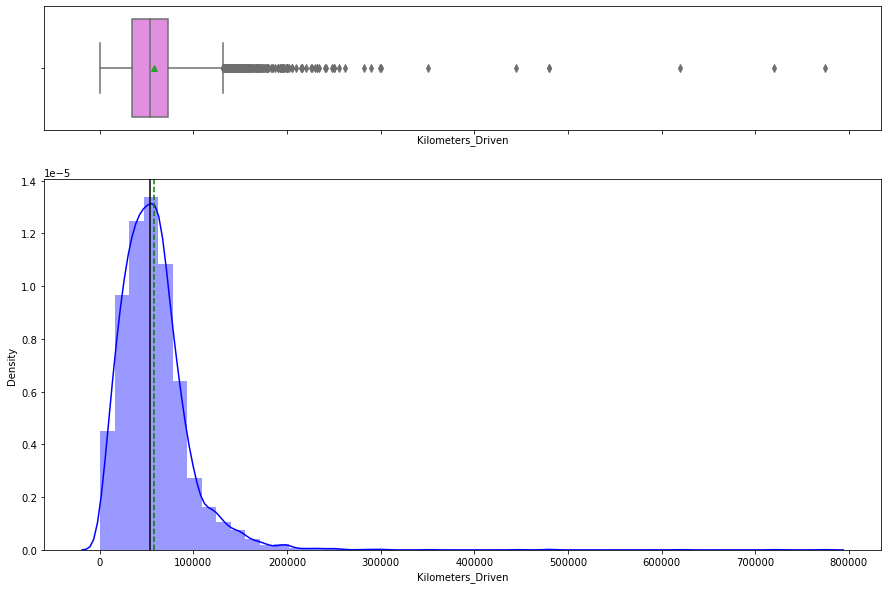

In [19]:
histogram_boxplot(data['Kilometers_Driven'])

**Observations (Part 1: Univariate Analysis on Kilometers Driven)**
- Kilometers driven is quite heavily right-skewed
- This feature can be log-transformed to reduce skew

In [20]:
data["Log_Kilometers_Driven"] = np.log(data["Kilometers_Driven"])

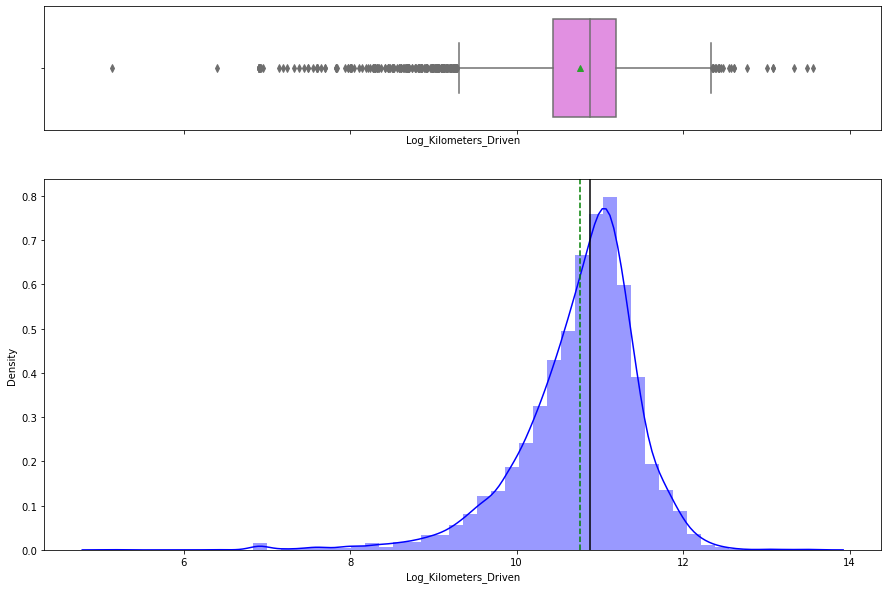

In [21]:
histogram_boxplot(data['Log_Kilometers_Driven'])

**Observations (Part 1: Univariate Analysis on Kilometers Driven)**
- After log transformation, the skew is reduced

### 1.1.2: Univariate Analysis on Mileage

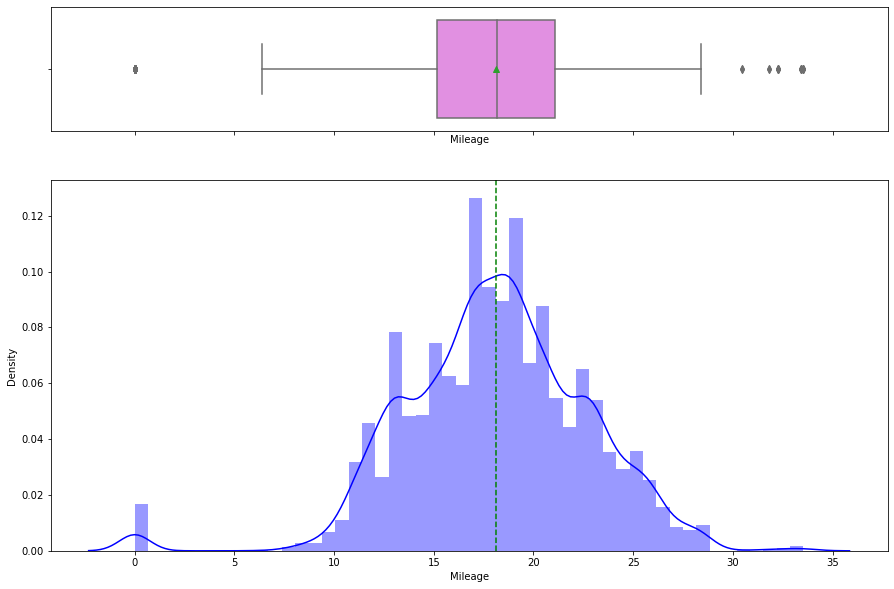

In [22]:
histogram_boxplot(data['Mileage'])

**Observations (Part 2: Univariate Analysis on Mileage)**
- Mileage is normally distributed with outliers at mileage = 0

### 1.1.3 Univariate Analysis on Engine

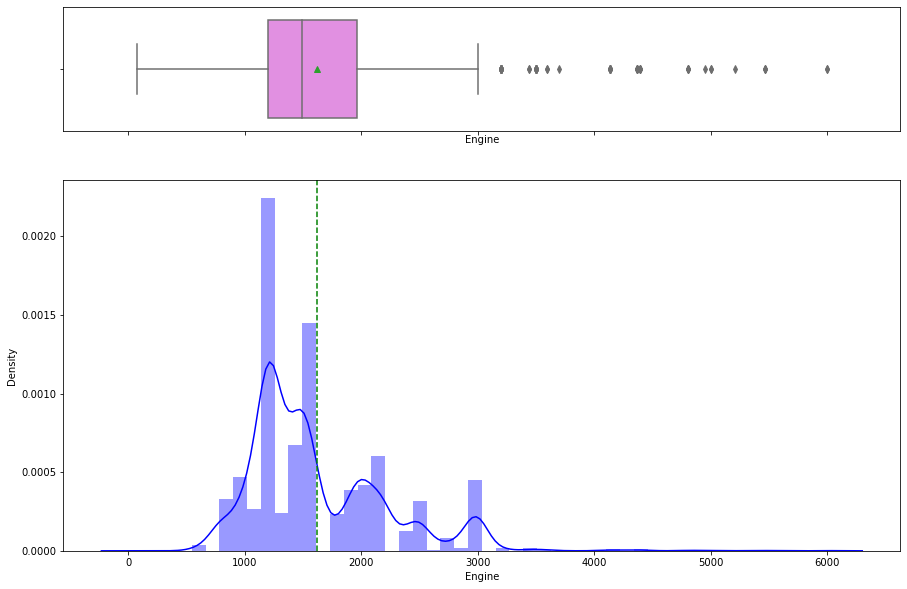

In [23]:
histogram_boxplot(data['Engine'])

### 1.1.4: Univariate Analysis on Power

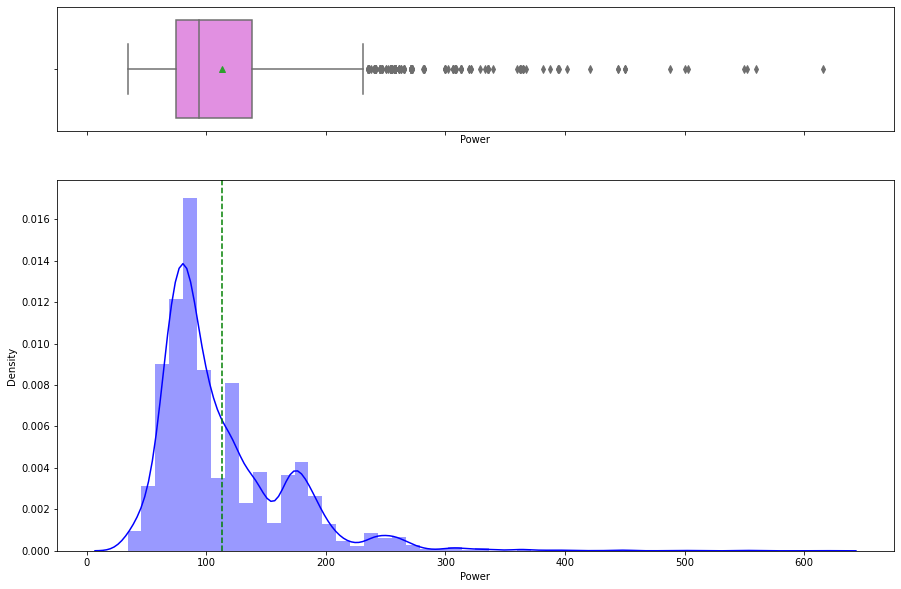

In [24]:
histogram_boxplot(data['Power'])

### 1.1.5: Univariate Analysis on New_price

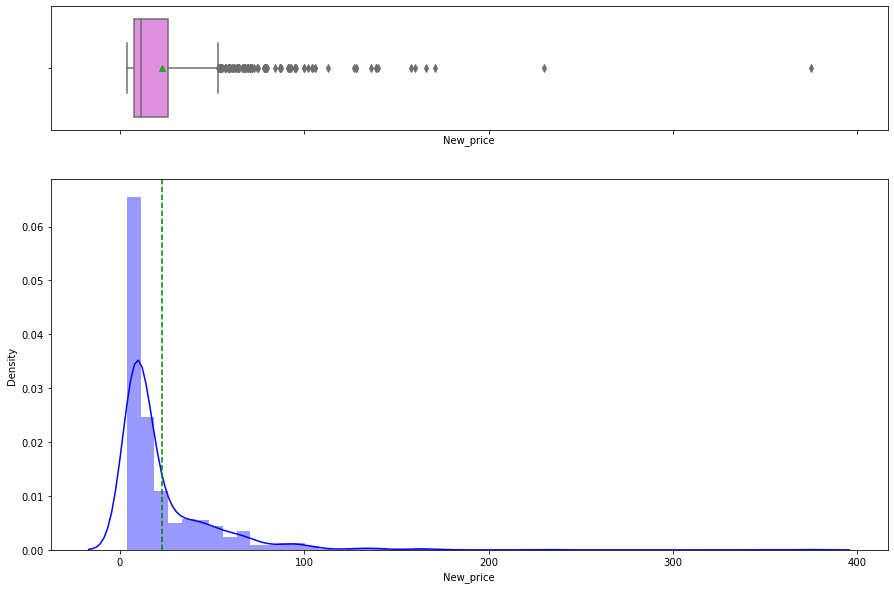

In [25]:
histogram_boxplot(data['New_price'])

### 1.1.6: Univariate Analysis on Price

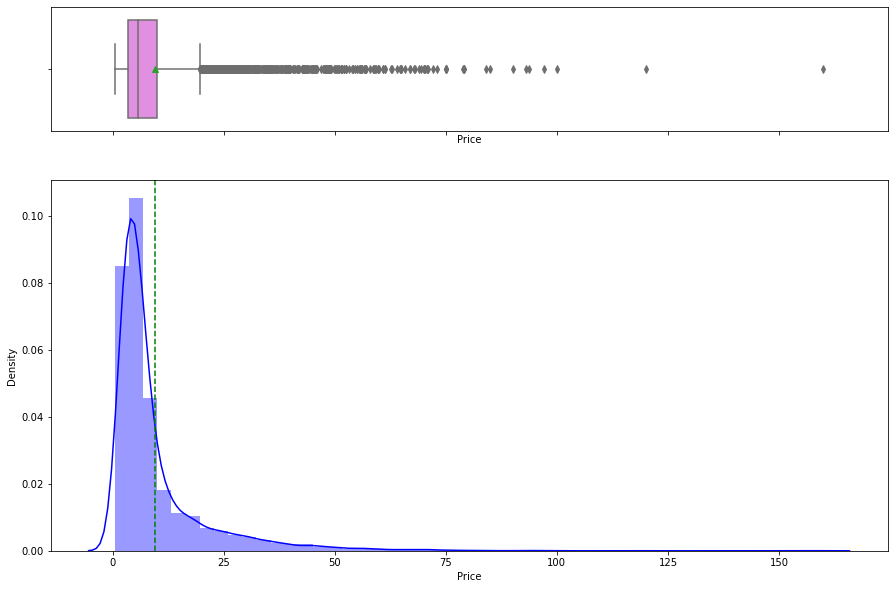

In [26]:
histogram_boxplot(data['Price'])

In [27]:
data["Log_Price"] = np.log(data["Price"])

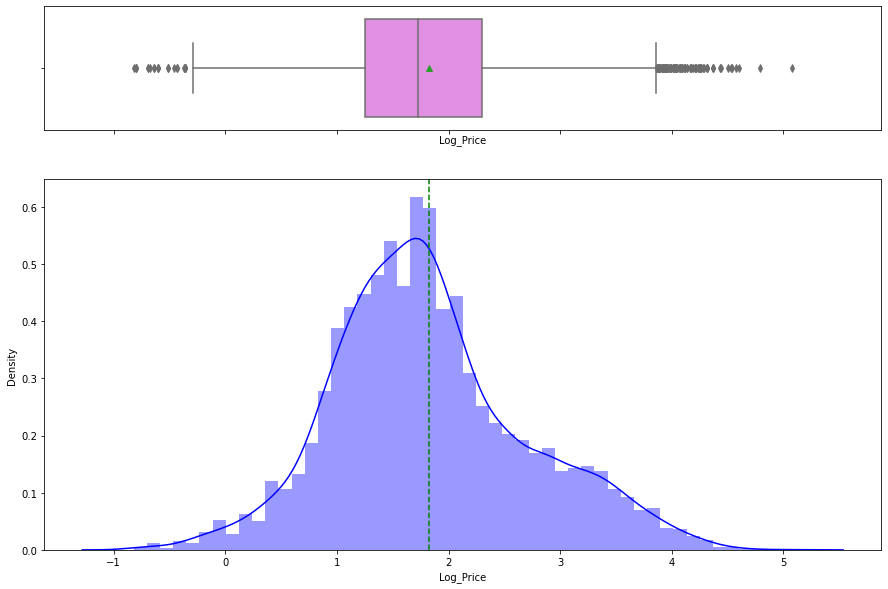

In [28]:
histogram_boxplot(data['Log_Price'])

### 1.1.7: Univariate Analysis on Location

In [29]:
def perc_on_bar(z, order=True):
    total = len(data[z])
    plt.figure(figsize=(15,5))
    if(order==True):
        ax = sns.countplot(data[z], palette = 'Paired', order = data[z].value_counts().index)
    else:
        ax = sns.countplot(data[z], palette = 'Paired')
    
    
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() /2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x,y), size=12)
    plt.show()        

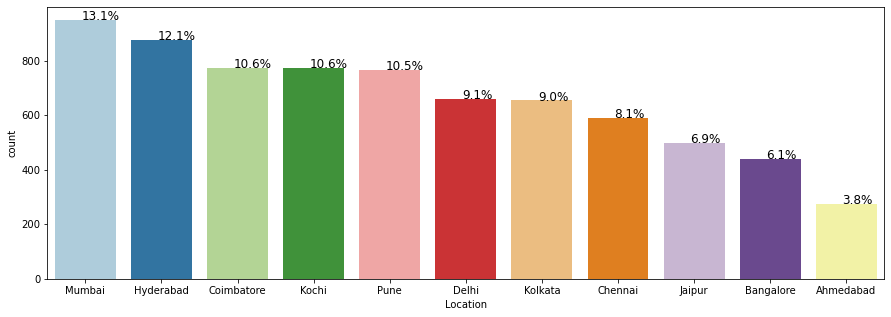

In [30]:
perc_on_bar('Location')

### 1.1.8: Univariate Analysis on Year

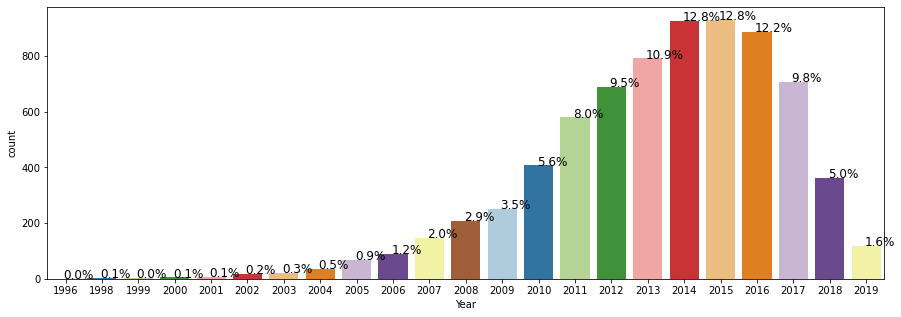

In [31]:
perc_on_bar('Year', order = False)

### 1.1.9: Univariate Analysis on Fuel Type

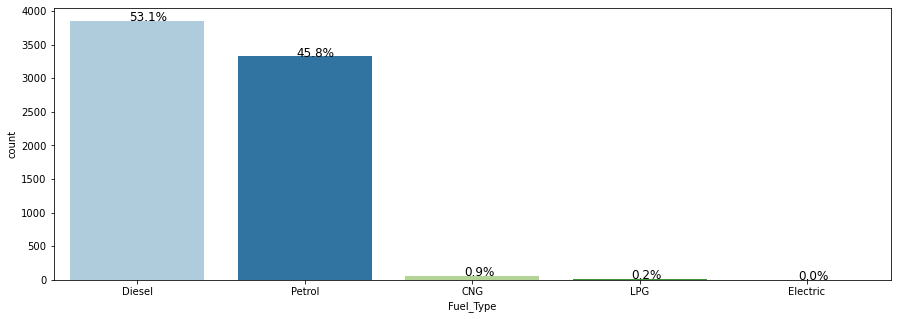

In [32]:
perc_on_bar('Fuel_Type')

### 1.1.10: Univariate Analysis on Transmission

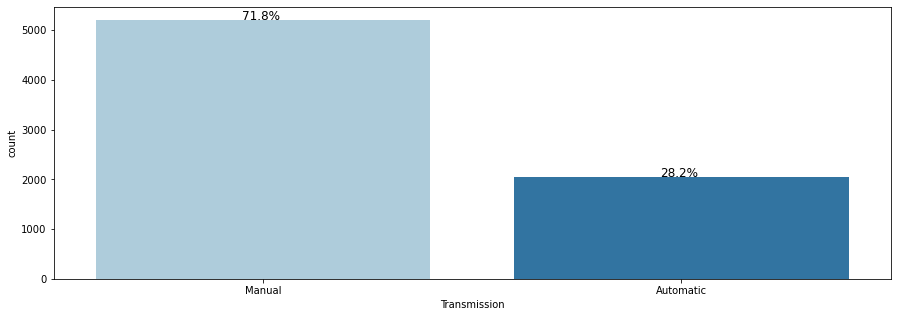

In [33]:
perc_on_bar('Transmission')

### 1.1.11: Univariate Analysis on Number of Seats

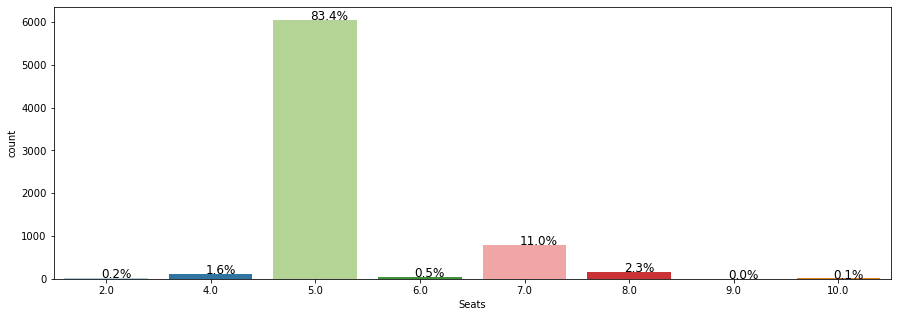

In [34]:
perc_on_bar('Seats', order=False)

### 1.1.12: Univariate Analysis on Owner Type

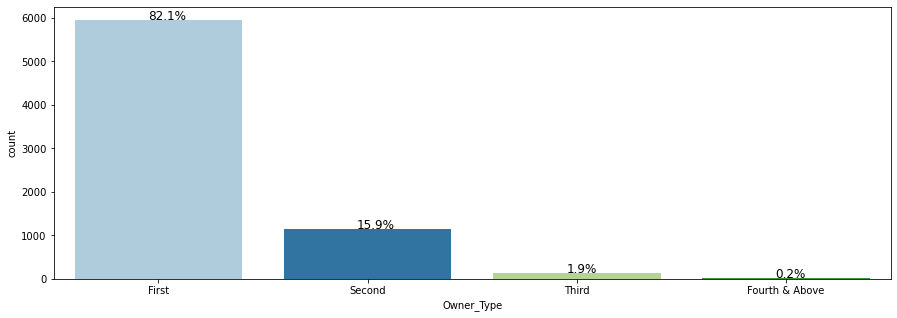

In [35]:
perc_on_bar('Owner_Type')

## 1.2 Bivariate Analysis

### 1.2.1: Pairplot

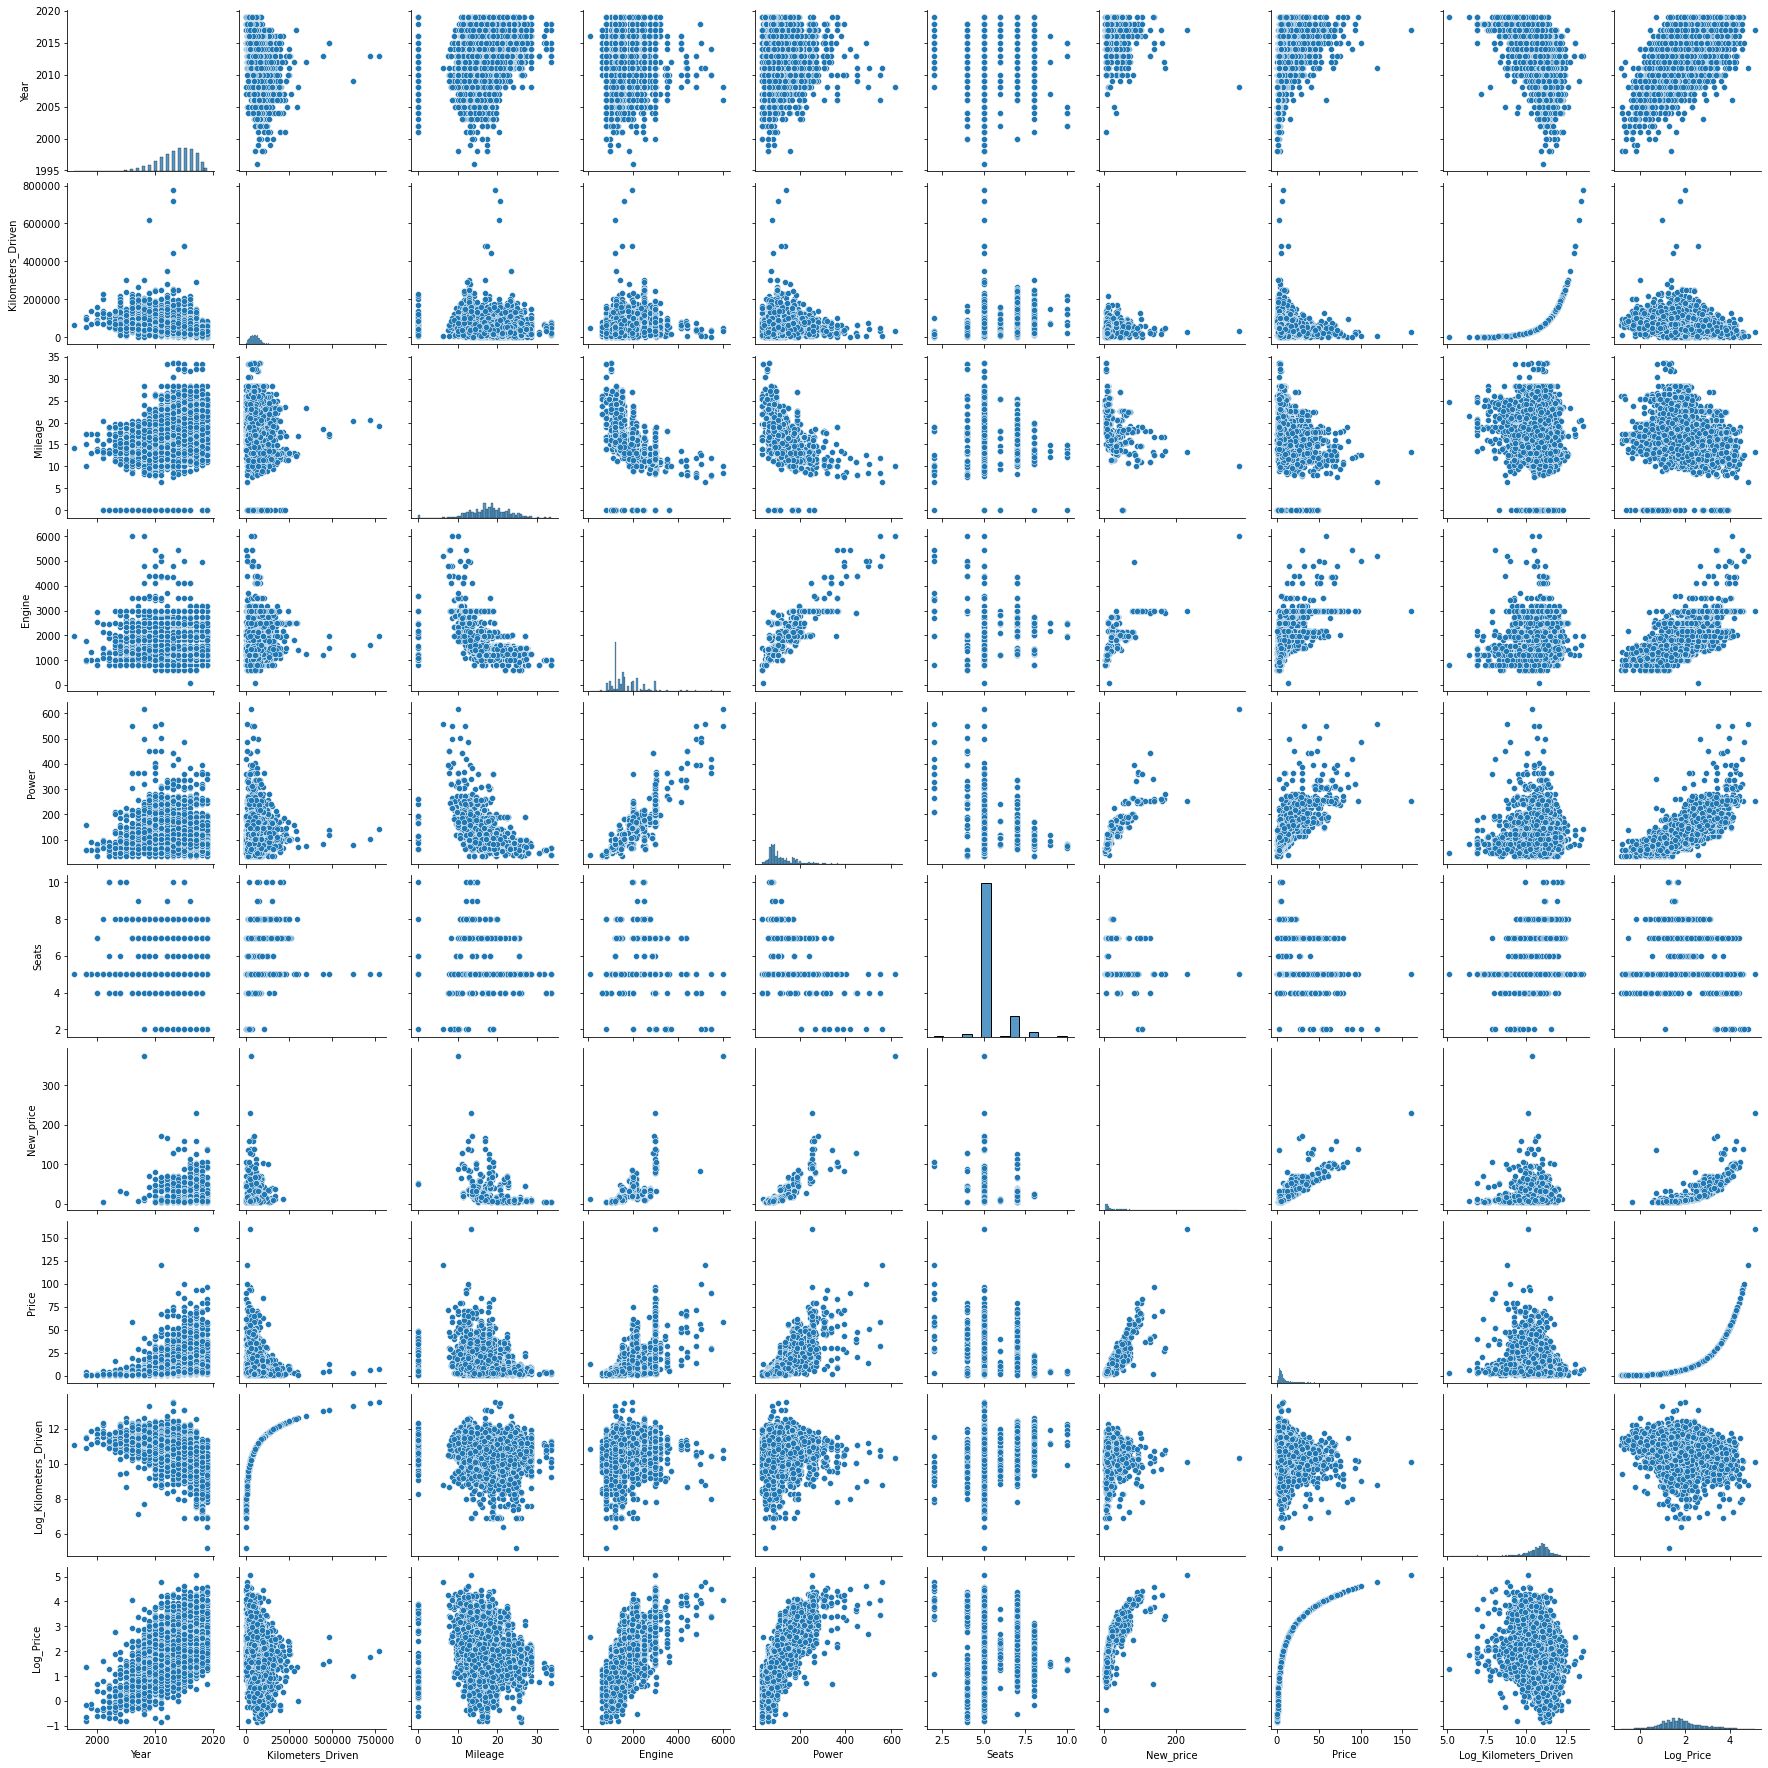

In [36]:
sns.pairplot(data)
plt.show()

### 1.2.2: Correlation Heatmap

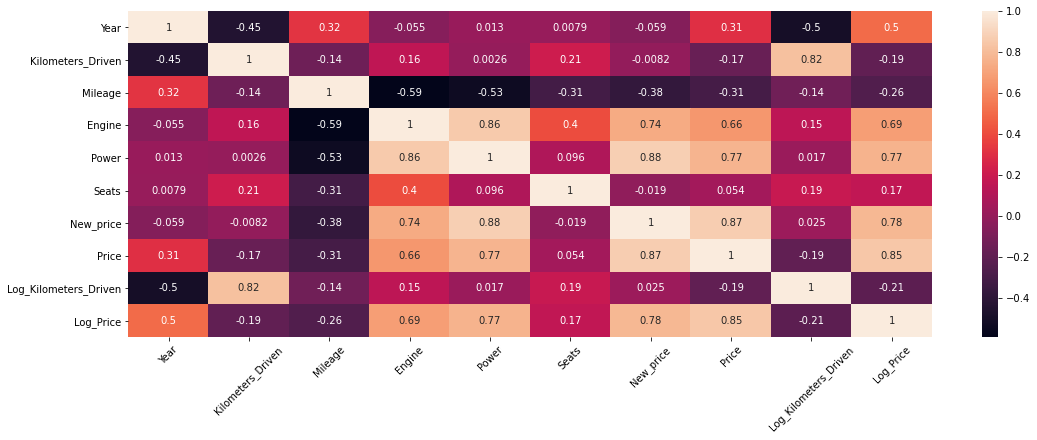

In [37]:
fig= plt.figure(figsize=(18, 6))
sns.heatmap(data.corr(), annot=True);
plt.xticks(rotation=45);

### 1.2.3 Pairwise Scatterplot

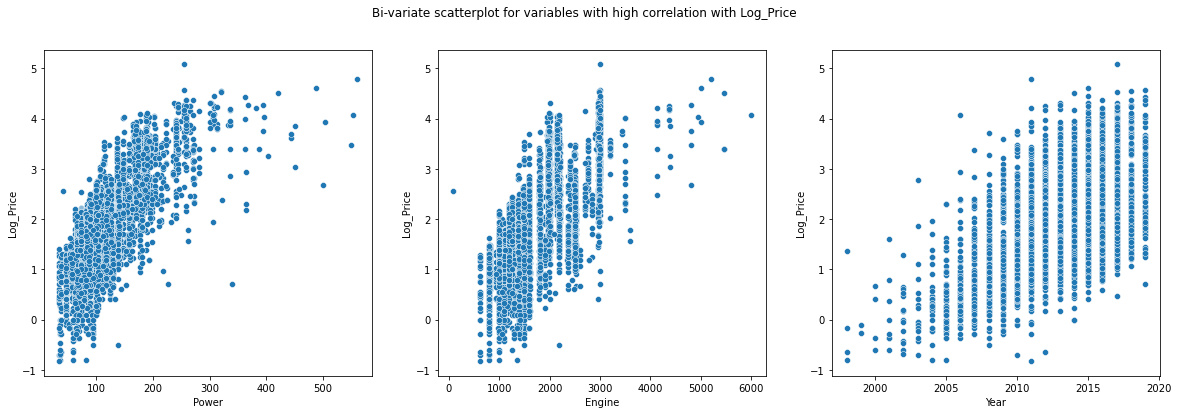

In [38]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
  
fig.suptitle('Bi-variate scatterplot for variables with high correlation with Log_Price')
  
sns.scatterplot(x='Power', y='Log_Price', data=data, ax=axes[0]);
sns.scatterplot(x='Engine', y='Log_Price', data=data, ax=axes[1]);
sns.scatterplot(x='Year', y='Log_Price', data=data, ax=axes[2]);

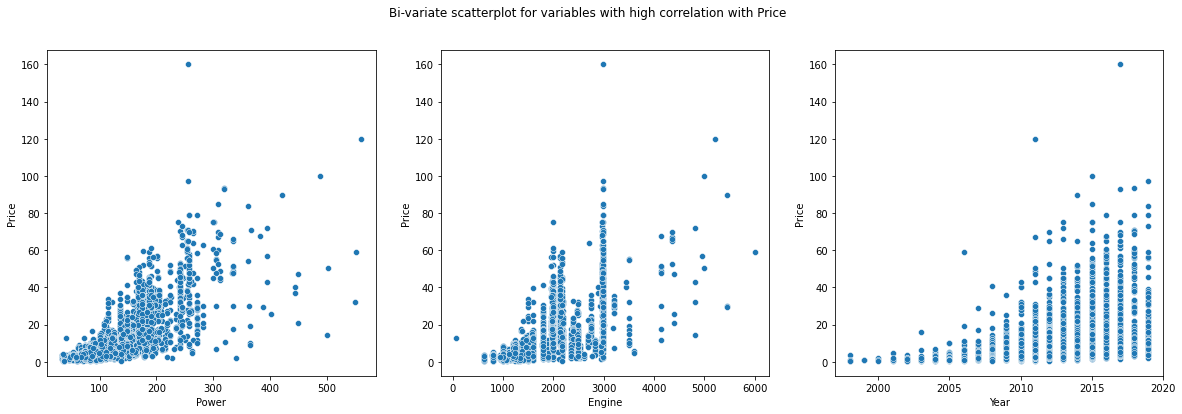

In [39]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
  
fig.suptitle('Bi-variate scatterplot for variables with high correlation with Price')
  
sns.scatterplot(x='Power', y='Price', data=data, ax=axes[0]);
sns.scatterplot(x='Engine', y='Price', data=data, ax=axes[1]);
sns.scatterplot(x='Year', y='Price', data=data, ax=axes[2]);

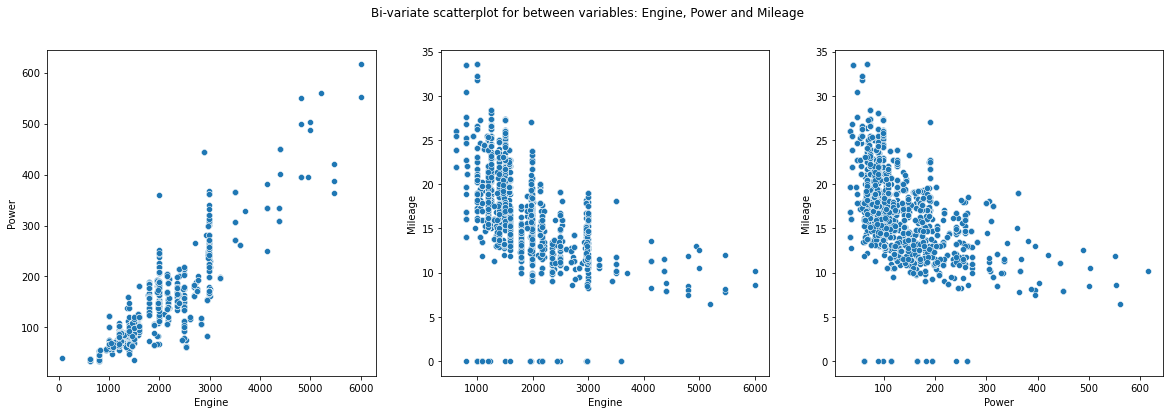

In [40]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
  
fig.suptitle('Bi-variate scatterplot for between variables: Engine, Power and Mileage')
  
sns.scatterplot(x='Engine', y='Power', data=data, ax=axes[0]);
sns.scatterplot(x='Engine', y='Mileage', data=data, ax=axes[1]);
sns.scatterplot(x='Power', y='Mileage', data=data, ax=axes[2]);

### 1.2.4  Boxplot: Log_Price vs Location

In [41]:
def boxplot(z):
    plt.figure(figsize=(12,5))
    sns.boxplot(x=z, y=data['Log_Price'])
    plt.show()
    plt.figure(figsize=(12,5))
    plt.title('Without Outliers')
    sns.boxplot(x=z, y=data['Log_Price'], showfliers=False)
    plt.show()

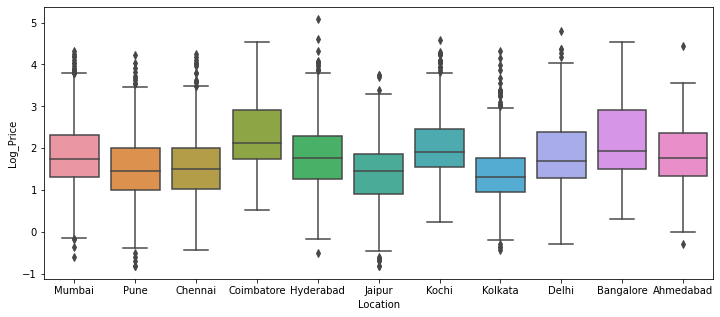

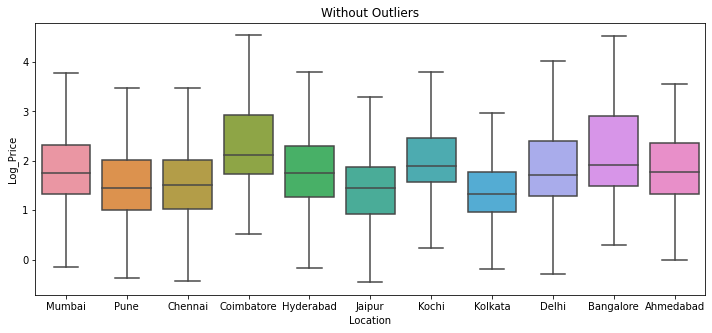

In [42]:
boxplot(data['Location'])

### 1.2.5 Boxplot: Price vs Fuel_Type

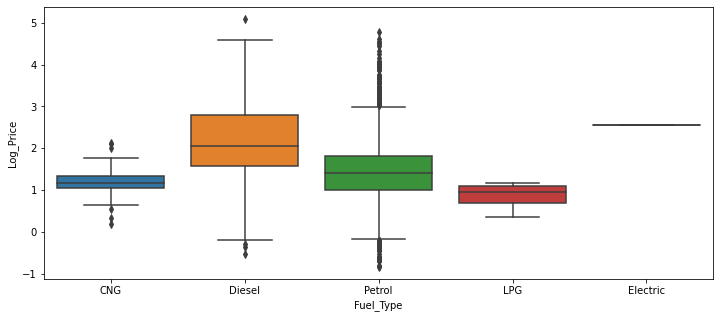

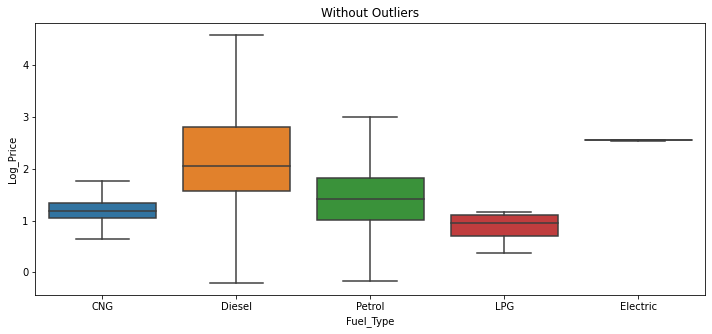

In [43]:
boxplot(data['Fuel_Type'])

### 1.2.6 Boxplot: Price vs Transmission

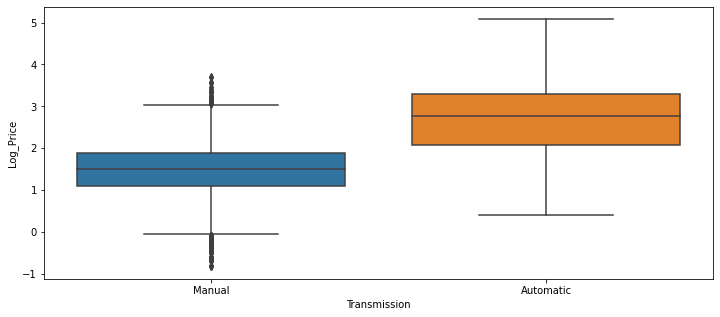

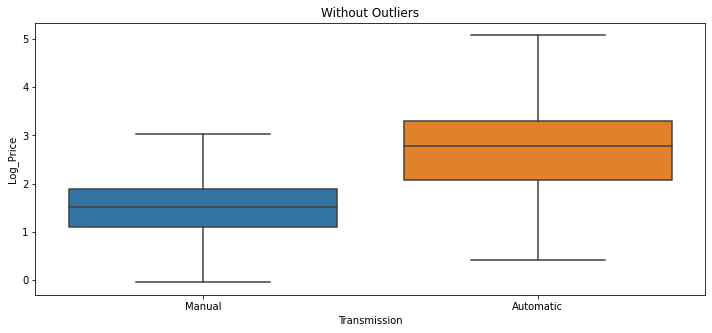

In [44]:
boxplot(data['Transmission'])

### 1.2.7 Boxplot: Price vs Owner_Type

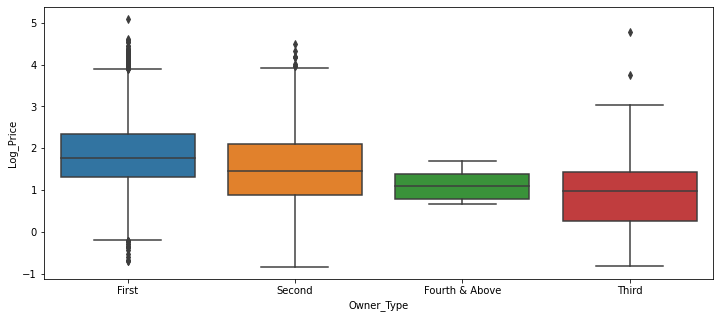

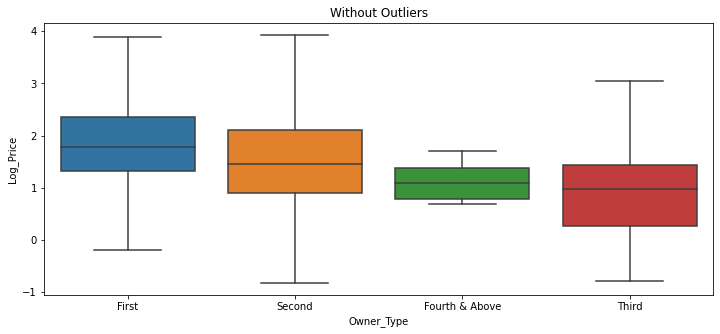

In [45]:
boxplot(data['Owner_Type'])

## 1.3 Feature Engineering

### 1.3.1: Car Brand Name

In [46]:
data["Name"] = data["Name"].apply(lambda x: x.lower().replace("land rover", "landrover"))
data["Brand"] = data["Name"].apply(lambda x: x.split(" ")[0])
brand_count = data["Brand"].value_counts()
data["Brand"].value_counts()

maruti           1444
hyundai          1340
honda             743
toyota            507
mercedes-benz     380
volkswagen        374
ford              351
mahindra          331
bmw               311
audi              285
tata              228
skoda             202
renault           170
chevrolet         151
nissan            117
landrover          67
jaguar             48
fiat               38
mitsubishi         36
mini               31
volvo              28
porsche            19
jeep               19
datsun             17
isuzu               5
force               3
bentley             2
smart               1
ambassador          1
lamborghini         1
hindustan           1
opelcorsa           1
Name: Brand, dtype: int64

In [47]:
len(data["Brand"].value_counts())

32

In [48]:
brand_count[brand_count==1].index[:]

Index(['smart', 'ambassador', 'lamborghini', 'hindustan', 'opelcorsa'], dtype='object')

In [49]:
len(brand_count[brand_count==1].index[:])

5

**Observation**
- There are a total of 5 brand names with only 1 car each

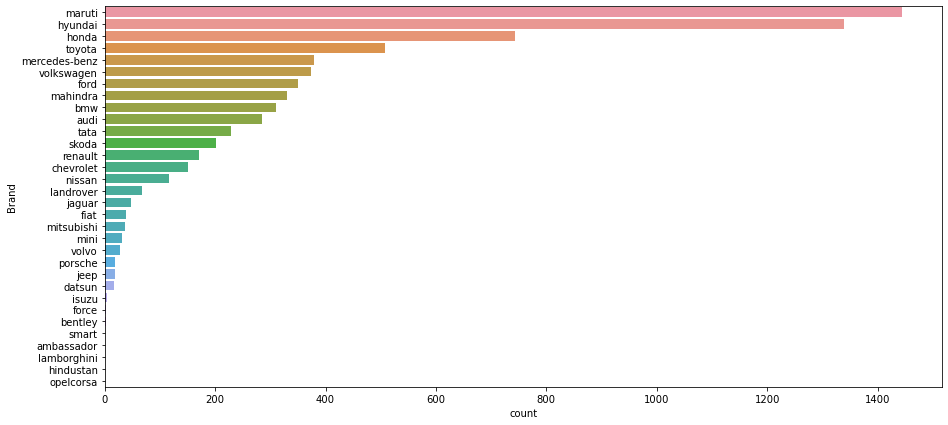

In [50]:
plt.figure(figsize=(15,7))
sns.countplot(y="Brand", data=data, order=data["Brand"].value_counts().index)
plt.show()

### 1.3.2: Car Model Name

In [51]:
data["Model"] = data["Name"].apply(lambda x: x.split(" ")[1].lower())
model_count = data["Model"].value_counts()
data["Model"].value_counts()

swift        418
city         318
i20          303
innova       203
verna        200
            ... 
cls-class      1
redi           1
e              1
mustang        1
1.4gsi         1
Name: Model, Length: 220, dtype: int64

In [52]:
model_count[model_count==1].index[:]

Index(['continental', 'prius', 'wr-v', 'petra', 'gallardo', 'f', 'motors',
       '1000', 'flying', 'land', 'mu', '370z', 'abarth', 'sl-class',
       'platinum', 'siena', 'venture', 'xuv300', 'tiguan', 'boxster', 'evalia',
       'fortwo', 'montero', 'countryman', 'fusion', 'mux', 'beetle',
       'cls-class', 'redi', 'e', 'mustang', '1.4gsi'],
      dtype='object')

In [53]:
len(model_count[model_count==1].index[:])

32

**Observation**
- There is a total of 32 model names with only 1 car each, which is a significant number
- This means that these model features will create sparse columns during one-hot encoding
- This may be a problem for training machine learning models and may be a problem when we try to use on new data in production
- A potential way to overcome this is to use Lasso regression

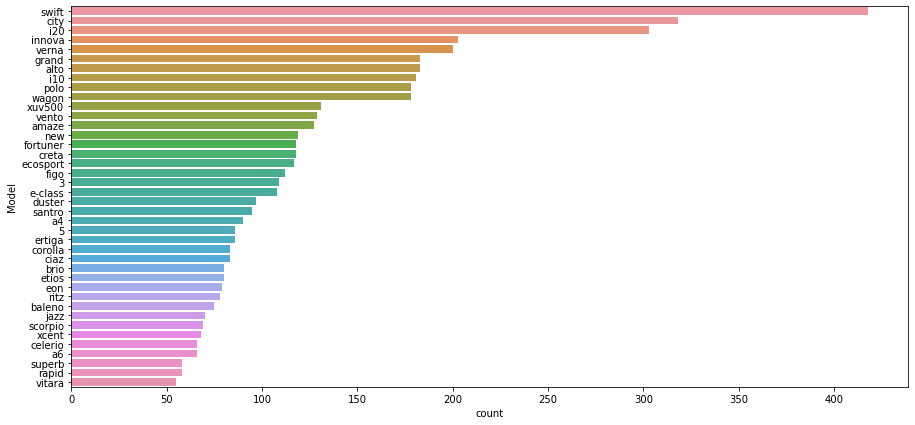

In [54]:
plt.figure(figsize=(15,7))
sns.countplot(y="Model", data=data, order=data["Model"].value_counts().index[0:40])
plt.show()

In [55]:
data.groupby(["Brand"])["Price"].mean().sort_values(ascending=False)

Brand
lamborghini      120.000000
bentley           59.000000
porsche           48.348333
landrover         39.259500
jaguar            37.632250
mini              26.896923
mercedes-benz     26.809874
audi              25.537712
bmw               25.093684
volvo             18.802857
jeep              18.718667
isuzu             14.696667
toyota            11.580024
mitsubishi        11.058889
force              9.333333
mahindra           8.045919
skoda              7.559075
ford               6.889400
renault            5.799034
honda              5.411743
hyundai            5.343433
volkswagen         5.307270
nissan             4.738352
maruti             4.517267
tata               3.562849
fiat               3.269286
datsun             3.049231
chevrolet          3.044463
smart              3.000000
ambassador         1.350000
hindustan               NaN
opelcorsa               NaN
Name: Price, dtype: float64

### 1.3.3 Missing Value Treatment (Seats)

In [56]:
data.isnull().sum()

Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     2
Engine                     46
Power                     175
Seats                      53
New_price                6246
Price                    1234
Log_Kilometers_Driven       0
Log_Price                1234
Brand                       0
Model                       0
dtype: int64

In [57]:
# Determine rows with seats which are null
data[data['Seats'].isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,Log_Kilometers_Driven,Log_Price,Brand,Model
194,honda city 1.5 gxi,Ahmedabad,2007,60006,Petrol,Manual,First,0.00,NaN,NaN,NaN,NaN,2.95,11.002200,1.081805,honda,city
208,maruti swift 1.3 vxi,Kolkata,2010,42001,Petrol,Manual,First,16.10,NaN,NaN,NaN,NaN,2.11,10.645449,0.746688,maruti,swift
229,ford figo diesel,Bangalore,2015,70436,Diesel,Manual,First,0.00,1498.0,99.0,NaN,NaN,3.60,11.162460,1.280934,ford,figo
733,maruti swift 1.3 vxi,Chennai,2006,97800,Petrol,Manual,Third,16.10,NaN,NaN,NaN,NaN,1.75,11.490680,0.559616,maruti,swift
749,landrover range rover 3.0 d,Mumbai,2008,55001,Diesel,Automatic,Second,0.00,NaN,NaN,NaN,NaN,26.50,10.915107,3.277145,landrover,range
1294,honda city 1.3 dx,Delhi,2009,55005,Petrol,Manual,First,12.80,NaN,NaN,NaN,NaN,3.20,10.915179,1.163151,honda,city
1327,maruti swift 1.3 zxi,Hyderabad,2015,50295,Petrol,Manual,First,16.10,NaN,NaN,NaN,NaN,5.80,10.825661,1.757858,maruti,swift
1385,honda city 1.5 gxi,Pune,2004,115000,Petrol,Manual,Second,0.00,NaN,NaN,NaN,NaN,1.50,11.652687,0.405465,honda,city
1460,landrover range rover sport 2005 2012 sport,Coimbatore,2008,69078,Petrol,Manual,First,0.00,NaN,NaN,NaN,NaN,40.88,11.142992,3.710641,landrover,range
1917,honda city 1.5 exi,Jaipur,2005,88000,Petrol,Manual,Second,13.00,1493.0,100.0,NaN,NaN,1.70,11.385092,0.530628,honda,city


In [58]:
# Group data by model median seats
data.groupby(["Brand","Model"], as_index=False)["Seats"].median()

,Brand,Model,Seats
0,ambassador,classic,5.0
1,audi,a3,5.0
2,audi,a4,5.0
3,audi,a6,5.0
4,audi,a7,5.0
...,...,...,...
219,volvo,s60,5.0
220,volvo,s80,5.0
221,volvo,v40,5.0
222,volvo,xc60,5.0


In [59]:
# Impute null seat value rows with the median of the same model
data["Seats"] = data.groupby(["Brand","Model"])["Seats"].transform(lambda x: x.fillna(x.median()))

In [60]:
# Find remaining null values
data[data['Seats'].isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,Log_Kilometers_Driven,Log_Price,Brand,Model
2369,maruti estilo lxi,Chennai,2008,56000,Petrol,Manual,Second,19.5,1061.0,NaN,NaN,NaN,1.50,10.933107,0.405465,maruti,estilo
3882,maruti estilo lxi,Kolkata,2010,40000,Petrol,Manual,Second,19.5,1061.0,NaN,NaN,NaN,2.50,10.596635,0.916291,maruti,estilo
5893,maruti estilo lxi,Chennai,2008,51000,Petrol,Manual,Second,19.5,1061.0,NaN,NaN,NaN,1.75,10.839581,0.559616,maruti,estilo


In [61]:
# Impute remaining rows which are from the model Maruti Estilo LXI which has 5 seats
data["Seats"] = data["Seats"].fillna(5.0)

In [62]:
# Confirm that there are no null seat values
data.isnull().sum()

Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     2
Engine                     46
Power                     175
Seats                       0
New_price                6246
Price                    1234
Log_Kilometers_Driven       0
Log_Price                1234
Brand                       0
Model                       0
dtype: int64

### 1.3.4 Missing Value Treatment (Mileage)

In [63]:
# Checking which rows have null mileage values
data[data['Mileage'].isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,Log_Kilometers_Driven,Log_Price,Brand,Model
4446,mahindra e verito d4,Chennai,2016,50000,Electric,Automatic,First,NaN,72.0,41.0,5.0,13.58,13.00,10.819778,2.564949,mahindra,e
4904,toyota prius 2009-2016 z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798.0,73.0,5.0,NaN,12.75,10.691945,2.545531,toyota,prius


In [64]:
data[data['Fuel_Type']=='Electric']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,Log_Kilometers_Driven,Log_Price,Brand,Model
4446,mahindra e verito d4,Chennai,2016,50000,Electric,Automatic,First,NaN,72.0,41.0,5.0,13.58,13.00,10.819778,2.564949,mahindra,e
4904,toyota prius 2009-2016 z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798.0,73.0,5.0,NaN,12.75,10.691945,2.545531,toyota,prius


In [65]:
data.drop([4446,4904],inplace=True)

**Observation**
- Electric cars have null mileage values. We will drop these data points as there are only 2 electric cars.

In [66]:
data[data['Mileage'].isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,Log_Kilometers_Driven,Log_Price,Brand,Model


In [67]:
data[data['Mileage']==0]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,Log_Kilometers_Driven,Log_Price,Brand,Model
14,landrover freelander 2 td4 se,Pune,2012,85000,Diesel,Automatic,Second,0.0,2179.0,115.00,5.0,NaN,17.50,11.350407,2.862201,landrover,freelander
67,mercedes-benz c-class progressive c 220d,Coimbatore,2019,15369,Diesel,Automatic,First,0.0,1950.0,194.00,5.0,49.14,35.67,9.640108,3.574310,mercedes-benz,c-class
79,hyundai santro xing xl,Hyderabad,2005,87591,Petrol,Manual,First,0.0,1086.0,NaN,5.0,NaN,1.30,11.380434,0.262364,hyundai,santro
194,honda city 1.5 gxi,Ahmedabad,2007,60006,Petrol,Manual,First,0.0,NaN,NaN,5.0,NaN,2.95,11.002200,1.081805,honda,city
229,ford figo diesel,Bangalore,2015,70436,Diesel,Manual,First,0.0,1498.0,99.00,5.0,NaN,3.60,11.162460,1.280934,ford,figo
262,hyundai santro xing xl,Hyderabad,2006,99000,Petrol,Manual,First,0.0,1086.0,NaN,5.0,NaN,1.75,11.502875,0.559616,hyundai,santro
307,hyundai santro xing xl,Chennai,2006,58000,Petrol,Manual,Second,0.0,1086.0,NaN,5.0,NaN,1.50,10.968198,0.405465,hyundai,santro
424,volkswagen jetta 2007-2011 1.9 l tdi,Hyderabad,2010,42021,Diesel,Manual,First,0.0,1968.0,NaN,5.0,NaN,5.45,10.645925,1.695616,volkswagen,jetta
443,hyundai santro gls i - euro i,Coimbatore,2012,50243,Petrol,Manual,First,0.0,1086.0,NaN,5.0,NaN,3.35,10.824627,1.208960,hyundai,santro
544,mercedes-benz new c-class progressive c 200,Kochi,2019,13190,Petrol,Automatic,First,0.0,1950.0,181.43,5.0,49.49,38.99,9.487214,3.663305,mercedes-benz,new


In [68]:
len(data[data['Mileage']==0])

81

**Observations**
- There are 81 rows with mileage equal 0 which is impossible
- We will impute these rows with the median values according to the median values of their fuel types

In [69]:
data['Mileage'] = data['Mileage'].replace(0,np.nan)
data["Mileage"] = data.groupby("Fuel_Type")["Mileage"].transform(lambda x: x.fillna(x.median()))

In [70]:
data.groupby("Fuel_Type")["Mileage"].median()

Fuel_Type
CNG       26.60
Diesel    19.01
LPG       17.30
Petrol    17.92
Name: Mileage, dtype: float64

In [71]:
data[data['Mileage']==0]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,Log_Kilometers_Driven,Log_Price,Brand,Model


In [72]:
data[data['Mileage'].isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,Log_Kilometers_Driven,Log_Price,Brand,Model


### 1.3.5 Missing Value Treatment (Engine, Power, Price, New_Price)

In [73]:
data["Engine"].fillna(data["Engine"].median(), inplace=True)

In [74]:
data["Power"].fillna(data["Power"].median(), inplace=True)

In [75]:
data.isnull().sum()

Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     0
Engine                      0
Power                       0
Seats                       0
New_price                6245
Price                    1234
Log_Kilometers_Driven       0
Log_Price                1234
Brand                       0
Model                       0
dtype: int64

**Observations:**
- There is a substantial total of 6245 null values for New_price and therefore we will leave the feature out as it would not be accurate to impute

In [76]:
data.isnull().sum()

Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     0
Engine                      0
Power                       0
Seats                       0
New_price                6245
Price                    1234
Log_Kilometers_Driven       0
Log_Price                1234
Brand                       0
Model                       0
dtype: int64

In [77]:
cars_data = data[data["Price"].notna()]

In [78]:
cars_data = cars_data.drop(['New_price'], axis=1)

In [79]:
cars_data.isnull().sum()

Name                     0
Location                 0
Year                     0
Kilometers_Driven        0
Fuel_Type                0
Transmission             0
Owner_Type               0
Mileage                  0
Engine                   0
Power                    0
Seats                    0
Price                    0
Log_Kilometers_Driven    0
Log_Price                0
Brand                    0
Model                    0
dtype: int64

In [80]:
cars_data.describe(include=['object'])

,Name,Location,Fuel_Type,Transmission,Owner_Type,Brand,Model
count,6016,6016,6016,6016,6016,6016,6016
unique,1850,11,4,2,4,30,211
top,maruti swift dzire vdi,Mumbai,Diesel,Manual,First,maruti,swift
freq,50,789,3204,4299,4926,1211,353


**Conclusions**
1. Missing value treatment has been completed and there are no further missing values
2. `cars_data` is the finalised dataframe with a total of 11 locations, 4 fuel types, 2 transmission types, 4 owner types, 30 brands, and 211 model names 

# 2. Model Building

1. Output variables: `Price` and `Log_Price`
2. Categorical features will be encoded
3. Data will be split into train and test to evaluate models
4. Models to be built: Linear Regression on all features, Lasso Regression, Decision Tree, Random Forest and Bagging Regressor
5. Model performance will be evaluated using the train and test datasets

In [81]:
[col for col in cars_data.columns]

['Name',
 'Location',
 'Year',
 'Kilometers_Driven',
 'Fuel_Type',
 'Transmission',
 'Owner_Type',
 'Mileage',
 'Engine',
 'Power',
 'Seats',
 'Price',
 'Log_Kilometers_Driven',
 'Log_Price',
 'Brand',
 'Model']

**Observations**
- Out of the columns in `cars_data`, `price` and `log_price` can be removed as they will be output variables
- `Name` can be removed as `Brand` and `Model` have been created
- `Kilometers_driven` can be removed as `Log_Kilometers_Driven` has been created
- New dataframes, `X` and `y` will be created for the machine learning models to work on

In [82]:
X = cars_data.drop(['Name', 'Price', 'Log_Price', 'Kilometers_Driven'], axis=1)
X.describe(include=['object'])

,Location,Fuel_Type,Transmission,Owner_Type,Brand,Model
count,6016,6016,6016,6016,6016,6016
unique,11,4,2,4,30,211
top,Mumbai,Diesel,Manual,First,maruti,swift
freq,789,3204,4299,4926,1211,353


In [83]:
X = pd.get_dummies(X, drop_first=True)
y = cars_data[['Price', 'Log_Price']]

In [84]:
features = [col for col in X.columns]

In [85]:
output = [col for col in y.columns]

In [86]:
X.head()

,Year,Mileage,Engine,Power,Seats,Log_Kilometers_Driven,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Brand_audi,Brand_bentley,Brand_bmw,Brand_chevrolet,Brand_datsun,Brand_fiat,Brand_force,Brand_ford,Brand_honda,Brand_hyundai,Brand_isuzu,Brand_jaguar,Brand_jeep,Brand_lamborghini,Brand_landrover,Brand_mahindra,Brand_maruti,Brand_mercedes-benz,Brand_mini,Brand_mitsubishi,Brand_nissan,Brand_porsche,Brand_renault,Brand_skoda,Brand_smart,Brand_tata,Brand_toyota,Brand_volkswagen,Brand_volvo,Model_1000,Model_3,Model_5,Model_6,Model_7,Model_800,Model_a,Model_a-star,Model_a3,Model_a4,Model_a6,Model_a7,Model_a8,Model_accent,Model_accord,Model_alto,Model_amaze,Model_ameo,Model_aspire,Model_aveo,Model_avventura,Model_b,Model_baleno,Model_beat,Model_beetle,Model_bolero,Model_bolt,Model_boxster,Model_br-v,Model_brio,Model_brv,Model_c-class,Model_camry,Model_captiva,Model_captur,Model_cayenne,Model_cayman,Model_cedia,Model_celerio,Model_ciaz,Model_city,Model_civic,Model_cla,Model_classic,Model_cls-class,Model_clubman,Model_compass,Model_continental,Model_cooper,Model_corolla,Model_countryman,Model_cr-v,Model_creta,Model_crosspolo,Model_cruze,Model_d-max,Model_discovery,Model_duster,Model_dzire,Model_e-class,Model_ecosport,Model_eeco,Model_elantra,Model_elite,Model_endeavour,Model_enjoy,Model_eon,Model_ertiga,Model_esteem,Model_estilo,Model_etios,Model_evalia,Model_f,Model_fabia,Model_fiesta,Model_figo,Model_fluence,Model_fortuner,Model_fortwo,Model_freelander,Model_freestyle,Model_fusion,Model_gallardo,Model_getz,Model_gl-class,Model_gla,Model_glc,Model_gle,Model_gls,Model_go,Model_grand,Model_grande,Model_hexa,Model_i10,Model_i20,Model_ignis,Model_ikon,Model_indica,Model_indigo,Model_innova,Model_jazz,Model_jeep,Model_jetta,Model_koleos,Model_kuv,Model_kwid,Model_lancer,Model_laura,Model_linea,Model_lodgy,Model_logan,Model_m-class,Model_manza,Model_micra,Model_mobilio,Model_montero,Model_mustang,Model_mux,Model_nano,Model_new,Model_nexon,Model_nuvosport,Model_octavia,Model_omni,Model_one,Model_optra,Model_outlander,Model_pajero,Model_panamera,Model_passat,Model_petra,Model_platinum,Model_polo,Model_pulse,Model_punto,Model_q3,Model_q5,Model_q7,Model_qualis,Model_quanto,Model_r-class,Model_range,Model_rapid,Model_redi,Model_redi-go,Model_renault,Model_ritz,Model_rs5,Model_s,Model_s-class,Model_s-cross,Model_s60,Model_s80,Model_safari,Model_sail,Model_santa,Model_santro,Model_scala,Model_scorpio,Model_siena,Model_sl-class,Model_slc,Model_slk-class,Model_sonata,Model_spark,Model_ssangyong,Model_sumo,Model_sunny,Model_superb,Model_swift,Model_sx4,Model_tavera,Model_teana,Model_terrano,Model_thar,Model_tiago,Model_tigor,Model_tiguan,Model_tt,Model_tucson,Model_tuv,Model_v40,Model_vento,Model_venture,Model_verito,Model_verna,Model_versa,Model_vitara,Model_wagon,Model_wr-v,Model_wrv,Model_x-trail,Model_x1,Model_x3,Model_x5,Model_x6,Model_xc60,Model_xc90,Model_xcent,Model_xe,Model_xenon,Model_xf,Model_xj,Model_xuv300,Model_xuv500,Model_xylo,Model_yeti,Model_z4,Model_zen,Model_zest
0,2010,26.60,998.0,58.16,5.0,11.184421,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2015,19.67,1582.0,126.20,5.0,10.621327,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [87]:
y.head()

,Price,Log_Price
0,1.75,0.559616
1,12.50,2.525729
2,4.50,1.504077
3,6.00,1.791759
4,17.74,2.875822


In [88]:
#Split data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)
print(X_train.shape, X_test.shape)

(4211, 262) (1805, 262)


In [89]:
X_train.shape

(4211, 262)

In [90]:
y_train.shape

(4211, 2)

In [91]:
X_train.head()

,Year,Mileage,Engine,Power,Seats,Log_Kilometers_Driven,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Brand_audi,Brand_bentley,Brand_bmw,Brand_chevrolet,Brand_datsun,Brand_fiat,Brand_force,Brand_ford,Brand_honda,Brand_hyundai,Brand_isuzu,Brand_jaguar,Brand_jeep,Brand_lamborghini,Brand_landrover,Brand_mahindra,Brand_maruti,Brand_mercedes-benz,Brand_mini,Brand_mitsubishi,Brand_nissan,Brand_porsche,Brand_renault,Brand_skoda,Brand_smart,Brand_tata,Brand_toyota,Brand_volkswagen,Brand_volvo,Model_1000,Model_3,Model_5,Model_6,Model_7,Model_800,Model_a,Model_a-star,Model_a3,Model_a4,Model_a6,Model_a7,Model_a8,Model_accent,Model_accord,Model_alto,Model_amaze,Model_ameo,Model_aspire,Model_aveo,Model_avventura,Model_b,Model_baleno,Model_beat,Model_beetle,Model_bolero,Model_bolt,Model_boxster,Model_br-v,Model_brio,Model_brv,Model_c-class,Model_camry,Model_captiva,Model_captur,Model_cayenne,Model_cayman,Model_cedia,Model_celerio,Model_ciaz,Model_city,Model_civic,Model_cla,Model_classic,Model_cls-class,Model_clubman,Model_compass,Model_continental,Model_cooper,Model_corolla,Model_countryman,Model_cr-v,Model_creta,Model_crosspolo,Model_cruze,Model_d-max,Model_discovery,Model_duster,Model_dzire,Model_e-class,Model_ecosport,Model_eeco,Model_elantra,Model_elite,Model_endeavour,Model_enjoy,Model_eon,Model_ertiga,Model_esteem,Model_estilo,Model_etios,Model_evalia,Model_f,Model_fabia,Model_fiesta,Model_figo,Model_fluence,Model_fortuner,Model_fortwo,Model_freelander,Model_freestyle,Model_fusion,Model_gallardo,Model_getz,Model_gl-class,Model_gla,Model_glc,Model_gle,Model_gls,Model_go,Model_grand,Model_grande,Model_hexa,Model_i10,Model_i20,Model_ignis,Model_ikon,Model_indica,Model_indigo,Model_innova,Model_jazz,Model_jeep,Model_jetta,Model_koleos,Model_kuv,Model_kwid,Model_lancer,Model_laura,Model_linea,Model_lodgy,Model_logan,Model_m-class,Model_manza,Model_micra,Model_mobilio,Model_montero,Model_mustang,Model_mux,Model_nano,Model_new,Model_nexon,Model_nuvosport,Model_octavia,Model_omni,Model_one,Model_optra,Model_outlander,Model_pajero,Model_panamera,Model_passat,Model_petra,Model_platinum,Model_polo,Model_pulse,Model_punto,Model_q3,Model_q5,Model_q7,Model_qualis,Model_quanto,Model_r-class,Model_range,Model_rapid,Model_redi,Model_redi-go,Model_renault,Model_ritz,Model_rs5,Model_s,Model_s-class,Model_s-cross,Model_s60,Model_s80,Model_safari,Model_sail,Model_santa,Model_santro,Model_scala,Model_scorpio,Model_siena,Model_sl-class,Model_slc,Model_slk-class,Model_sonata,Model_spark,Model_ssangyong,Model_sumo,Model_sunny,Model_superb,Model_swift,Model_sx4,Model_tavera,Model_teana,Model_terrano,Model_thar,Model_tiago,Model_tigor,Model_tiguan,Model_tt,Model_tucson,Model_tuv,Model_v40,Model_vento,Model_venture,Model_verito,Model_verna,Model_versa,Model_vitara,Model_wagon,Model_wr-v,Model_wrv,Model_x-trail,Model_x1,Model_x3,Model_x5,Model_x6,Model_xc60,Model_xc90,Model_xcent,Model_xe,Model_xenon,Model_xf,Model_xj,Model_xuv300,Model_xuv500,Model_xylo,Model_yeti,Model_z4,Model_zen,Model_zest
4720,2012,13.20,1495.0,94.00,5.0,10.933107,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1518,2015,17.00,1497.0,118.00,5.0,10.373491,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

## 2.1 Linear Regression with Price and Log_Price

In this section, we want to compare the performance of a linear regression model between using `Price` and `Log_Price` as the output variable. We will be using all features.

In [92]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [93]:
def scale(x):
    scaler = MinMaxScaler()
    x_scaled = scaler.fit_transform(x)
    x_scaled = pd.DataFrame(x_scaled, index=x.index, columns=x.columns)
    return x_scaled

In [94]:
def get_model_score(model, x, y, values_list=False):
    y_pred = model.predict(x)
    #print('Coefficients: ', lm.coef_)
    
    mae = mean_absolute_error(y, y_pred)
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    r2 = r2_score(y, y_pred)
    
    if values_list==False:
        print('MAE: %.3f' %mae)
        print('RMSE: %.3f' %rmse)
        print('R2 score: ' '%.3f' %r2)
    else:
        return [mae, rmse, r2]

In [95]:
lm1 = LinearRegression().fit(scale(X_train), y_train['Price'])

In [96]:
get_model_score(lm1, scale(X_train), y_train['Price'])

MAE: 2.177
RMSE: 3.885
R2 score: 0.884


In [97]:
get_model_score(lm1, scale(X_test), y_test['Price'])

MAE: 264610040291.813
RMSE: 4108951432677.362
R2 score: -150160752429199012134912.000


In [98]:
lm2 = LinearRegression().fit(scale(X_train), y_train['Log_Price'])

In [99]:
get_model_score(lm2, scale(X_train), y_train['Log_Price'])

MAE: 0.122
RMSE: 0.175
R2 score: 0.960


In [100]:
get_model_score(lm2, scale(X_test), y_test['Log_Price'])

MAE: 14864751740.676
RMSE: 230417972869.081
R2 score: -71228520847547092172800.000


**Conclusion**
- Comparing log_price to price as the dependent variable, the linear regression model using log_price has higher r_squared value and lower errors.
- In both cases, the model does not perform well on test data, which may be due to the large number of features and due to sparsity of columns in brand and model names. The large number of features directly contribute to the model complexity.
- We will perform Lasso Regression Cross-Validation for feature selection and decrease the model complexity.

## 2.2 Lasso Regression for feature selection

In [101]:
y_train = y_train['Log_Price']
y_test = y_test['Log_Price']

In [102]:
from sklearn import linear_model
lassoRegCV = linear_model.LassoCV()

In [103]:
lassoRegCV.fit(X_train,y_train)

LassoCV()

In [104]:
lassoRegCV.score(X_train,y_train)

0.8052813988601939

In [105]:
lassoRegCV.score(X_test,y_test)

0.8241636607885118

In [106]:
coeff = list(lassoRegCV.coef_)
feature_importance = [(feature, coef) for feature, coef in zip(features, coeff)]

In [107]:
sorted_inputs = sorted(feature_importance, key=lambda tup: tup[1], reverse=True)
plt.figure(figsize=(13,13))
coefficient_df = pd.DataFrame(sorted_inputs, columns = ["Feature", "Coefficient"])
print(pd.DataFrame(sorted_inputs, columns = ["Feature", "Coefficient"]))

        Feature  Coefficient
0          Year     0.099829
1         Power     0.008280
2        Engine     0.000373
3       Mileage     0.000000
4         Seats     0.000000
..          ...          ...
257  Model_xylo    -0.000000
258  Model_yeti     0.000000
259    Model_z4    -0.000000
260   Model_zen    -0.000000
261  Model_zest    -0.000000

[262 rows x 2 columns]


<Figure size 936x936 with 0 Axes>

In [108]:
coefficient_df[coefficient_df["Coefficient"]>0].Feature[:]

0      Year
1     Power
2    Engine
Name: Feature, dtype: object

**Conclusions**
- LassoCV indicates that the features with non-zero coefficients are: `Year`, `Power` and `Engine`
- This suggests that features such as `Model` which has the highest number of categories may be dropped to reduce model complexity

## 2.3 Linear Regression (on all features except model names)

To decrease model complexity and improve the model performance on test data, we will explore building the model without the name of the models

In [109]:
X = cars_data.drop(['Name', 'Price', 'Log_Price', 'Kilometers_Driven', 'Model'], axis=1)
X = pd.get_dummies(X, drop_first=True)
y = cars_data[['Log_Price']]

In [110]:
X.head()

,Year,Mileage,Engine,Power,Seats,Log_Kilometers_Driven,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Brand_audi,Brand_bentley,Brand_bmw,Brand_chevrolet,Brand_datsun,Brand_fiat,Brand_force,Brand_ford,Brand_honda,Brand_hyundai,Brand_isuzu,Brand_jaguar,Brand_jeep,Brand_lamborghini,Brand_landrover,Brand_mahindra,Brand_maruti,Brand_mercedes-benz,Brand_mini,Brand_mitsubishi,Brand_nissan,Brand_porsche,Brand_renault,Brand_skoda,Brand_smart,Brand_tata,Brand_toyota,Brand_volkswagen,Brand_volvo
0,2010,26.60,998.0,58.16,5.0,11.184421,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,2015,19.67,1582.0,126.20,5.0,10.621327,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2011,18.20,1199.0,88.70,5.0,10.736397,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2012,20.77,1248.0,88.76,7.0,11.373663,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,2013,15.20,1968.0,140.80,5.0,10.613246,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [111]:
y.head()

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(4211, 52) (1805, 52) (4211, 1) (1805, 1)


In [112]:
X_train_scaled_0 = scale(X_train)
X_train_scaled_0.head()

,Year,Mileage,Engine,Power,Seats,Log_Kilometers_Driven,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Brand_audi,Brand_bentley,Brand_bmw,Brand_chevrolet,Brand_datsun,Brand_fiat,Brand_force,Brand_ford,Brand_honda,Brand_hyundai,Brand_isuzu,Brand_jaguar,Brand_jeep,Brand_lamborghini,Brand_landrover,Brand_mahindra,Brand_maruti,Brand_mercedes-benz,Brand_mini,Brand_mitsubishi,Brand_nissan,Brand_porsche,Brand_renault,Brand_skoda,Brand_smart,Brand_tata,Brand_toyota,Brand_volkswagen,Brand_volvo
4720,0.666667,0.250553,0.162077,0.113731,0.375,0.687905,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1518,0.809524,0.390567,0.162449,0.159376,0.375,0.621434,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3781,0.809524,0.633382,0.137700,0.062495,0.375,0.674192,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
685,0.666667,0.541636,0.116115,0.075504,0.375,0.802395,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2539,0.761905,0.689020,0.162635,0.122480,0.375,0.716095,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [113]:
X_train_scaled_0 = sm.add_constant(X_train_scaled_0)
ols_model_0 = sm.OLS(y_train, X_train_scaled_0)
ols_res_0 = ols_model_0.fit()

In [114]:
print(ols_res_0.summary())

                            OLS Regression Results                            
Dep. Variable:              Log_Price   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     964.8
Date:                Fri, 13 Aug 2021   Prob (F-statistic):               0.00
Time:                        14:59:20   Log-Likelihood:                -15.582
No. Observations:                4211   AIC:                             137.2
Df Residuals:                    4158   BIC:                             473.5
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

### Feature Selection (Iteration 1)

For each independent feature, the following hypothesis test is conducted.

H0 : Independent feature is not significant 

H1 : Independent feature is significant

Independent features with p-values less than 0.05 are considered to be statistically signifcant, while those more than 0.05 are not. We will remove features with p-value more than 0.05.

In [115]:
features_non_sig = []
for i in range(0,len(X_train_scaled_0.columns)):
    if(ols_res_0.pvalues[i]>0.05):
        features_non_sig.append(X_train_scaled_0.columns[i])
        
X_train_scaled_1 = X_train_scaled_0.drop(features_non_sig,axis=1)
features_lr = [col for col in X_train_scaled_1.columns]
features_lr

['Year',
 'Mileage',
 'Engine',
 'Power',
 'Seats',
 'Log_Kilometers_Driven',
 'Location_Bangalore',
 'Location_Coimbatore',
 'Location_Delhi',
 'Location_Hyderabad',
 'Location_Jaipur',
 'Location_Kolkata',
 'Location_Mumbai',
 'Location_Pune',
 'Fuel_Type_Diesel',
 'Transmission_Manual',
 'Owner_Type_Second',
 'Owner_Type_Third',
 'Brand_audi',
 'Brand_bmw',
 'Brand_datsun',
 'Brand_landrover',
 'Brand_mercedes-benz',
 'Brand_mini',
 'Brand_tata']

In [116]:
X_train_scaled_1 = sm.add_constant(X_train_scaled_1)
ols_model_1 = sm.OLS(y_train, X_train_scaled_1)
ols_res_1 = ols_model_1.fit()

In [117]:
print(ols_res_1.summary())

                            OLS Regression Results                            
Dep. Variable:              Log_Price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     1729.
Date:                Fri, 13 Aug 2021   Prob (F-statistic):               0.00
Time:                        14:59:20   Log-Likelihood:                -316.28
No. Observations:                4211   AIC:                             684.6
Df Residuals:                    4185   BIC:                             849.5
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.23

### Feature Selection (Iteration 2)
There are still independent features with p-value > 0.05 after the first iteration. These will be removed in the second interation.

In [118]:
features_non_sig = []
for i in range(0,len(X_train_scaled_1.columns)):
    if(ols_res_1.pvalues[i]>0.05):
        features_non_sig.append(X_train_scaled_1.columns[i])
        
X_train_scaled_2 = X_train_scaled_1.drop(features_non_sig,axis=1)
features_lr = [col for col in X_train_scaled_2.columns]
features_lr

['const',
 'Year',
 'Mileage',
 'Engine',
 'Power',
 'Seats',
 'Log_Kilometers_Driven',
 'Location_Bangalore',
 'Location_Coimbatore',
 'Location_Hyderabad',
 'Location_Jaipur',
 'Location_Kolkata',
 'Location_Mumbai',
 'Location_Pune',
 'Fuel_Type_Diesel',
 'Transmission_Manual',
 'Owner_Type_Second',
 'Owner_Type_Third',
 'Brand_audi',
 'Brand_bmw',
 'Brand_datsun',
 'Brand_landrover',
 'Brand_mercedes-benz',
 'Brand_mini',
 'Brand_tata']

In [119]:
X_train_scaled_2 = sm.add_constant(X_train_scaled_2)
ols_model_2 = sm.OLS(y_train, X_train_scaled_2)
ols_res_2 = ols_model_2.fit()

In [120]:
print(ols_res_2.summary())

                            OLS Regression Results                            
Dep. Variable:              Log_Price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     1800.
Date:                Fri, 13 Aug 2021   Prob (F-statistic):               0.00
Time:                        14:59:20   Log-Likelihood:                -317.97
No. Observations:                4211   AIC:                             685.9
Df Residuals:                    4186   BIC:                             844.6
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.24

**Observation**
- After 2 iterations, there are no further insignificant features
- We will do a final check on the p-values and retrieve the remaining significant features of the model

In [121]:
features_non_sig = []
for i in range(0,len(X_train_scaled_2.columns)):
    if(ols_res_2.pvalues[i]>0.05):
        features_non_sig.append(X_train_scaled_2.columns[i])
        
print(features_non_sig)
        
features_non_sig
features_lr

[]


['const',
 'Year',
 'Mileage',
 'Engine',
 'Power',
 'Seats',
 'Log_Kilometers_Driven',
 'Location_Bangalore',
 'Location_Coimbatore',
 'Location_Hyderabad',
 'Location_Jaipur',
 'Location_Kolkata',
 'Location_Mumbai',
 'Location_Pune',
 'Fuel_Type_Diesel',
 'Transmission_Manual',
 'Owner_Type_Second',
 'Owner_Type_Third',
 'Brand_audi',
 'Brand_bmw',
 'Brand_datsun',
 'Brand_landrover',
 'Brand_mercedes-benz',
 'Brand_mini',
 'Brand_tata']

In [122]:
print(ols_res_2.mse_resid)

0.06850120056415487


**Conclusion**
- There are no further features to be removed from this iteration
- R-sqaured value is high at **0.912** and MSE is low at **0.069**

### Tests for model assumptions

#### Part 1: No multicolliinearity among independent variables
- We will test for presence of multi-collinearity using Variation Inflation Factor.

- **Variance  Inflation  factor**:  Variance  inflation  factors  measures  the  inflation  in  the variances of the regression parameter estimates due to collinearities that exist among the  predictors.  It  is  a  measure  of  how  much  the  variance  of  the  estimated  regression coefficient βk is “inflated” by  the  existence  of  correlation  among  the  predictor variables in the model. 

- General Rule of thumb: If VIF is 1 then there is no correlation among the kth predictor and the remaining predictor variables, and  hence  the variance of β̂k is not inflated at all. Whereas if VIF exceeds 5 or is close to exceeding 5, we say there is moderate VIF and if it is 10 or exceeding 10, it shows signs of high multi-collinearity.

In [123]:
vif_series_1 = pd.Series([variance_inflation_factor(X_train_scaled_2.values,i) for i in range(X_train_scaled_2.shape[1])],
                        index=X_train_scaled_2.columns)

print('Series before feature selection: \n\n{}\n'.format(vif_series_1))

Series before feature selection: 

const                    268.770080
Year                       2.042266
Mileage                    3.130681
Engine                     8.774860
Power                      7.546641
Seats                      1.892969
Log_Kilometers_Driven      1.754760
Location_Bangalore         1.146550
Location_Coimbatore        1.233601
Location_Hyderabad         1.266167
Location_Jaipur            1.159843
Location_Kolkata           1.229180
Location_Mumbai            1.299357
Location_Pune              1.224952
Fuel_Type_Diesel           2.257014
Transmission_Manual        2.118247
Owner_Type_Second          1.180835
Owner_Type_Third           1.106346
Brand_audi                 1.377515
Brand_bmw                  1.530747
Brand_datsun               1.014798
Brand_landrover            1.084424
Brand_mercedes-benz        1.460357
Brand_mini                 1.037155
Brand_tata                 1.029544
dtype: float64



- We will remove `Engine` as it has the highest VIF score and retrain the model

In [124]:
X_train_scaled_3 = X_train_scaled_2.drop(['Engine'], axis=1)
ols_model_3 = sm.OLS(y_train, X_train_scaled_3)
ols_res_3 = ols_model_3.fit()

features_lr = [col for col in X_train_scaled_3.columns]
features_lr

['const',
 'Year',
 'Mileage',
 'Power',
 'Seats',
 'Log_Kilometers_Driven',
 'Location_Bangalore',
 'Location_Coimbatore',
 'Location_Hyderabad',
 'Location_Jaipur',
 'Location_Kolkata',
 'Location_Mumbai',
 'Location_Pune',
 'Fuel_Type_Diesel',
 'Transmission_Manual',
 'Owner_Type_Second',
 'Owner_Type_Third',
 'Brand_audi',
 'Brand_bmw',
 'Brand_datsun',
 'Brand_landrover',
 'Brand_mercedes-benz',
 'Brand_mini',
 'Brand_tata']

In [125]:
print(ols_res_3.summary())

                            OLS Regression Results                            
Dep. Variable:              Log_Price   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     1812.
Date:                Fri, 13 Aug 2021   Prob (F-statistic):               0.00
Time:                        14:59:20   Log-Likelihood:                -386.76
No. Observations:                4211   AIC:                             821.5
Df Residuals:                    4187   BIC:                             973.8
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.17

In [126]:
vif_series_2 = pd.Series([variance_inflation_factor(X_train_scaled_3.values,i) for i in range(X_train_scaled_3.shape[1])],
                        index=X_train_scaled_3.columns)

print('Series before feature selection: \n\n{}\n'.format(vif_series_2))

Series before feature selection: 

const                    266.750697
Year                       2.038163
Mileage                    2.655574
Power                      3.003964
Seats                      1.665284
Log_Kilometers_Driven      1.754557
Location_Bangalore         1.146550
Location_Coimbatore        1.233477
Location_Hyderabad         1.266087
Location_Jaipur            1.159676
Location_Kolkata           1.229179
Location_Mumbai            1.298308
Location_Pune              1.224927
Fuel_Type_Diesel           1.846669
Transmission_Manual        2.117332
Owner_Type_Second          1.180822
Owner_Type_Third           1.106339
Brand_audi                 1.341867
Brand_bmw                  1.501100
Brand_datsun               1.014798
Brand_landrover            1.083531
Brand_mercedes-benz        1.456347
Brand_mini                 1.037145
Brand_tata                 1.029498
dtype: float64



- **Conclusion**: After removing `Engine`, all VIF scores are less than 5, and we can conclude multicollinearity has been removed. The final training dataset is `X_train_scaled_3` and the OLS model is `ols_res_3`.

#### Part 2: Test for mean of residuals

In [127]:
residual = ols_res_3.resid
residual.mean()

1.8247890335640217e-14

- **Conclusion**: The mean of residuals is very close to zero and therefore this condition is satisfied

#### Part 3: Normality of residuals

<AxesSubplot:ylabel='Count'>

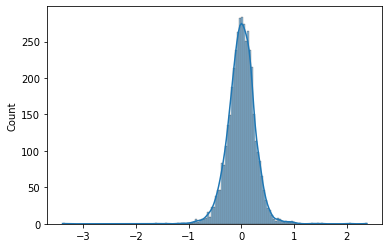

In [128]:
sns.histplot(residual, kde=True)

- **Conclusion**: The residuals are normally distributed and therefore this condition is satisfied

#### Part 4: Test for linearity

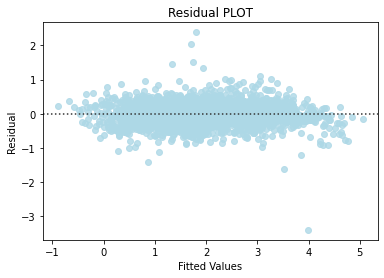

In [129]:
fitted = ols_res_2.fittedvalues
sns.residplot(x = fitted, y = residual, color="lightblue")
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Residual PLOT")
plt.show()

- **Conclusion**: The residuals are linearly related to the dependent variable and therefore this condition is satisfied.

#### Part 5: Test for Homoskedasticity

In [130]:
from statsmodels.stats.diagnostic import het_white
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

In [131]:
name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(y_train, X_train_scaled_3)
lzip(name, test)

[('F statistic', 1.1360116861533447), ('p-value', 0.0018203796415357035)]

**Conclusion on Assumptions**
- Assumptions for linear regression are satisfied except for homoskedasticity.

In [132]:
print(ols_res_3.mse_resid)

0.07075922260683436


In [133]:
del features_lr[0]

In [134]:
features_lr

['Year',
 'Mileage',
 'Power',
 'Seats',
 'Log_Kilometers_Driven',
 'Location_Bangalore',
 'Location_Coimbatore',
 'Location_Hyderabad',
 'Location_Jaipur',
 'Location_Kolkata',
 'Location_Mumbai',
 'Location_Pune',
 'Fuel_Type_Diesel',
 'Transmission_Manual',
 'Owner_Type_Second',
 'Owner_Type_Third',
 'Brand_audi',
 'Brand_bmw',
 'Brand_datsun',
 'Brand_landrover',
 'Brand_mercedes-benz',
 'Brand_mini',
 'Brand_tata']

In [135]:
X_train[features_lr].head()

,Year,Mileage,Power,Seats,Log_Kilometers_Driven,Location_Bangalore,Location_Coimbatore,Location_Hyderabad,Location_Jaipur,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Transmission_Manual,Owner_Type_Second,Owner_Type_Third,Brand_audi,Brand_bmw,Brand_datsun,Brand_landrover,Brand_mercedes-benz,Brand_mini,Brand_tata
4720,2012,13.20,94.00,5.0,10.933107,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1518,2015,17.00,118.00,5.0,10.373491,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
3781,2015,23.59,67.06,5.0,10.817656,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
685,2012,21.10,73.90,5.0,11.896990,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
2539,2014,25.10,98.60,5.0,11.170435,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0


In [136]:
y_train.head()

,Log_Price
4720,0.896088
1518,1.704748
3781,1.662030
685,1.266948
2539,2.008214


In [137]:
lm4 = LinearRegression().fit(scale(X_train[features_lr]), y_train)

In [138]:
get_model_score(lm4, scale(X_train[features_lr]), y_train)

MAE: 0.195
RMSE: 0.265
R2 score: 0.909


In [139]:
get_model_score(lm4, scale(X_test[features_lr]), y_test)

MAE: 0.261
RMSE: 0.341
R2 score: 0.844


In [140]:
from sklearn.model_selection import cross_val_score

linearregression = LinearRegression() 
cv_Score11 = cross_val_score(linearregression, X_train[features_lr], y_train, cv = 10)
cv_Score12 = cross_val_score(linearregression, X_train[features_lr], y_train, cv = 10, 
                             scoring = 'neg_mean_squared_error') 


print("RSquared: %0.3f (+/- %0.3f)" % (cv_Score11.mean(), cv_Score11.std() * 2))
print("Mean Squared Error: %0.3f (+/- %0.3f)" % (-1*cv_Score12.mean(), cv_Score12.std() * 2))

RSquared: 0.907 (+/- 0.032)
Mean Squared Error: 0.071 (+/- 0.026)


**Conclusion on Linear Regression Model (on all features except model names)**
- While the model performs well on both training and test data, it does not fulfill all assumptions of the linear regression model. We should explore non-linear models such as decision trees and random forests.
- The R-Squared on the cross validation is 0.907 which is almost similar to the R-Squared on the training dataset, which indicates that the model is neither over or under fitted.
- And the MSE on cross validation is 0.071 which is almost similar to the R-Squared on the training dataset.

## 2.4: Decision Tree Regressor

In [141]:
X = cars_data.drop(['Name', 'Price', 'Log_Price', 'Kilometers_Driven'], axis=1)
X = pd.get_dummies(X, drop_first=True)
y = cars_data[['Log_Price']]

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)
print(X_train.shape, X_test.shape)

(4211, 262) (1805, 262)


In [143]:
from sklearn.model_selection import cross_val_score

In [144]:
dtree = DecisionTreeRegressor(random_state=1)

In [145]:
dtree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1)

In [146]:
y_pred = dtree.predict(X_test)

In [147]:
score = dtree.score(X_train, y_train)
print(score)

0.999995116853998


In [148]:
get_model_score(dtree, X_train, y_train)

MAE: 0.000
RMSE: 0.002
R2 score: 1.000


In [149]:
get_model_score(dtree, X_test, y_test)

MAE: 0.198
RMSE: 0.291
R2 score: 0.887


In [150]:
score = cross_val_score(dtree, X_train, y_train, cv =10)
print(score.mean())  

0.8751564769973994


**Observations (Decision Tree, Part 1)**
- The decision tree is overfitting on training data (since R2 on training data is close to 1.00 and R2 on test data is only 0.886) and hence may not generalize well on test data.

In [151]:
prediction_importance = list(dtree.feature_importances_)
input_importance = [(feature, importance) for feature, importance in zip(features, prediction_importance)]

                  Feature  Importance
0                   Power    0.629732
1                    Year    0.231166
2                  Engine    0.024737
3   Log_Kilometers_Driven    0.015530
4                 Mileage    0.013222
5             Model_range    0.006132
6              Brand_tata    0.004691
7     Transmission_Manual    0.004497
8        Location_Kolkata    0.003958
9      Location_Hyderabad    0.003639
10          Model_cayenne    0.003526
11                  Seats    0.003144
12         Brand_mahindra    0.002995
13             Brand_audi    0.002592
14              Brand_bmw    0.002421
15            Brand_honda    0.002366
16    Location_Coimbatore    0.002333
17           Model_cooper    0.002018
18       Brand_volkswagen    0.001927
19         Location_Delhi    0.001631


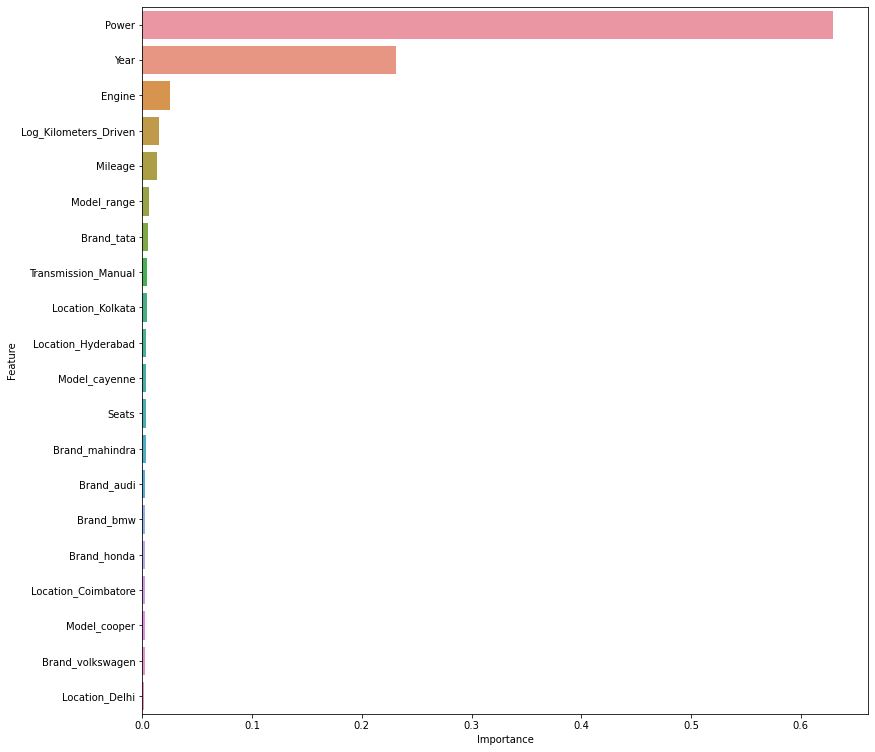

In [152]:
sorted_inputs = sorted(input_importance, key=lambda tup: tup[1], reverse=True)
plt.figure(figsize=(13,13))
importance_df = pd.DataFrame(sorted_inputs, columns = ["Feature", "Importance"])
sns.barplot(importance_df.Importance,importance_df.Feature.iloc[0:20])

print(pd.DataFrame(sorted_inputs, columns = ["Feature", "Importance"]).iloc[0:20])

In [153]:
importance_df[importance_df["Importance"]>0].Feature[:]

0                          Power
1                           Year
2                         Engine
3          Log_Kilometers_Driven
4                        Mileage
5                    Model_range
6                     Brand_tata
7            Transmission_Manual
8               Location_Kolkata
9             Location_Hyderabad
10                 Model_cayenne
11                         Seats
12                Brand_mahindra
13                    Brand_audi
14                     Brand_bmw
15                   Brand_honda
16           Location_Coimbatore
17                  Model_cooper
18              Brand_volkswagen
19                Location_Delhi
20             Owner_Type_Second
21                 Location_Pune
22               Location_Mumbai
23                    Brand_mini
24            Location_Bangalore
25                  Brand_toyota
26                   Model_creta
27           Brand_mercedes-benz
28               Location_Jaipur
29                Location_Kochi
30        

**Observations (Decision Tree, Part 2)**
- Top 5 features of the decision tree:  Power, Year, Engine, Log_Kilometers_Driven and Mileage
- We can perform hyperparameter tuning on the decision tree to reduce overfitting

In [154]:
dtree_tuned = DecisionTreeRegressor(random_state=1)
parameters = {'max_depth': list(np.arange(2,25,2)) + [None],
             'min_samples_leaf': [1,3,5,7],
              'max_leaf_nodes' : [2,5,7] + [None],             
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
gridCV = GridSearchCV(dtree_tuned, parameters, scoring=scorer, cv=10)
gridCV = gridCV.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_tuned = gridCV.best_estimator_

# Fit the best algorithm to the data. 
dtree_tuned.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=12, random_state=1)

In [155]:
dtree_tuned.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': 12,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 1,
 'splitter': 'best'}

In [156]:
get_model_score(dtree_tuned, X_train, y_train)

MAE: 0.090
RMSE: 0.137
R2 score: 0.976


In [157]:
get_model_score(dtree_tuned, X_test, y_test)

MAE: 0.196
RMSE: 0.288
R2 score: 0.889


In [158]:
score = cross_val_score(dtree_tuned, X_train, y_train, cv=10)
print(score.mean())  

0.8891374451343633


In [159]:
prediction_importance = list(dtree_tuned.feature_importances_)
input_importance = [(feature, importance) for feature, importance in zip(features, prediction_importance)]

                  Feature  Importance
0                   Power    0.644741
1                    Year    0.234565
2                  Engine    0.023815
3                 Mileage    0.012219
4   Log_Kilometers_Driven    0.010812
5             Model_range    0.007101
6              Brand_tata    0.005221
7     Transmission_Manual    0.004026
8           Model_cayenne    0.003617
9        Location_Kolkata    0.003433
10             Brand_audi    0.002892
11         Brand_mahindra    0.002771
12     Location_Hyderabad    0.002691
13                  Seats    0.002570
14            Brand_honda    0.002306
15       Brand_volkswagen    0.002176
16           Model_cooper    0.002054
17              Brand_bmw    0.001819
18                Model_5    0.001768
19    Location_Coimbatore    0.001694


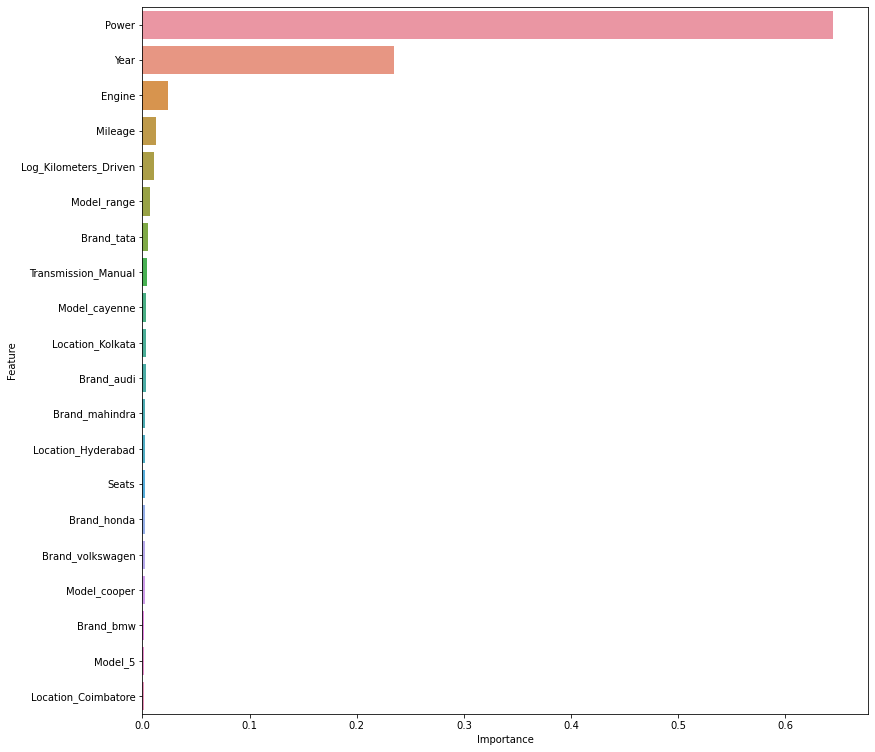

In [160]:
sorted_inputs = sorted(input_importance, key=lambda tup: tup[1], reverse=True)
plt.figure(figsize=(13,13))
importance_df = pd.DataFrame(sorted_inputs, columns = ["Feature", "Importance"])
sns.barplot(importance_df.Importance,importance_df.Feature.iloc[0:20])

print(pd.DataFrame(sorted_inputs, columns = ["Feature", "Importance"]).iloc[0:20])

In [161]:
importance_df[importance_df["Importance"]>0].Feature[:]

0                          Power
1                           Year
2                         Engine
3                        Mileage
4          Log_Kilometers_Driven
5                    Model_range
6                     Brand_tata
7            Transmission_Manual
8                  Model_cayenne
9               Location_Kolkata
10                    Brand_audi
11                Brand_mahindra
12            Location_Hyderabad
13                         Seats
14                   Brand_honda
15              Brand_volkswagen
16                  Model_cooper
17                     Brand_bmw
18                       Model_5
19           Location_Coimbatore
20                    Brand_mini
21                   Model_creta
22                Location_Delhi
23             Owner_Type_Second
24                 Location_Pune
25                   Model_swift
26                   Model_etios
27              Fuel_Type_Petrol
28               Brand_landrover
29            Location_Bangalore
30        

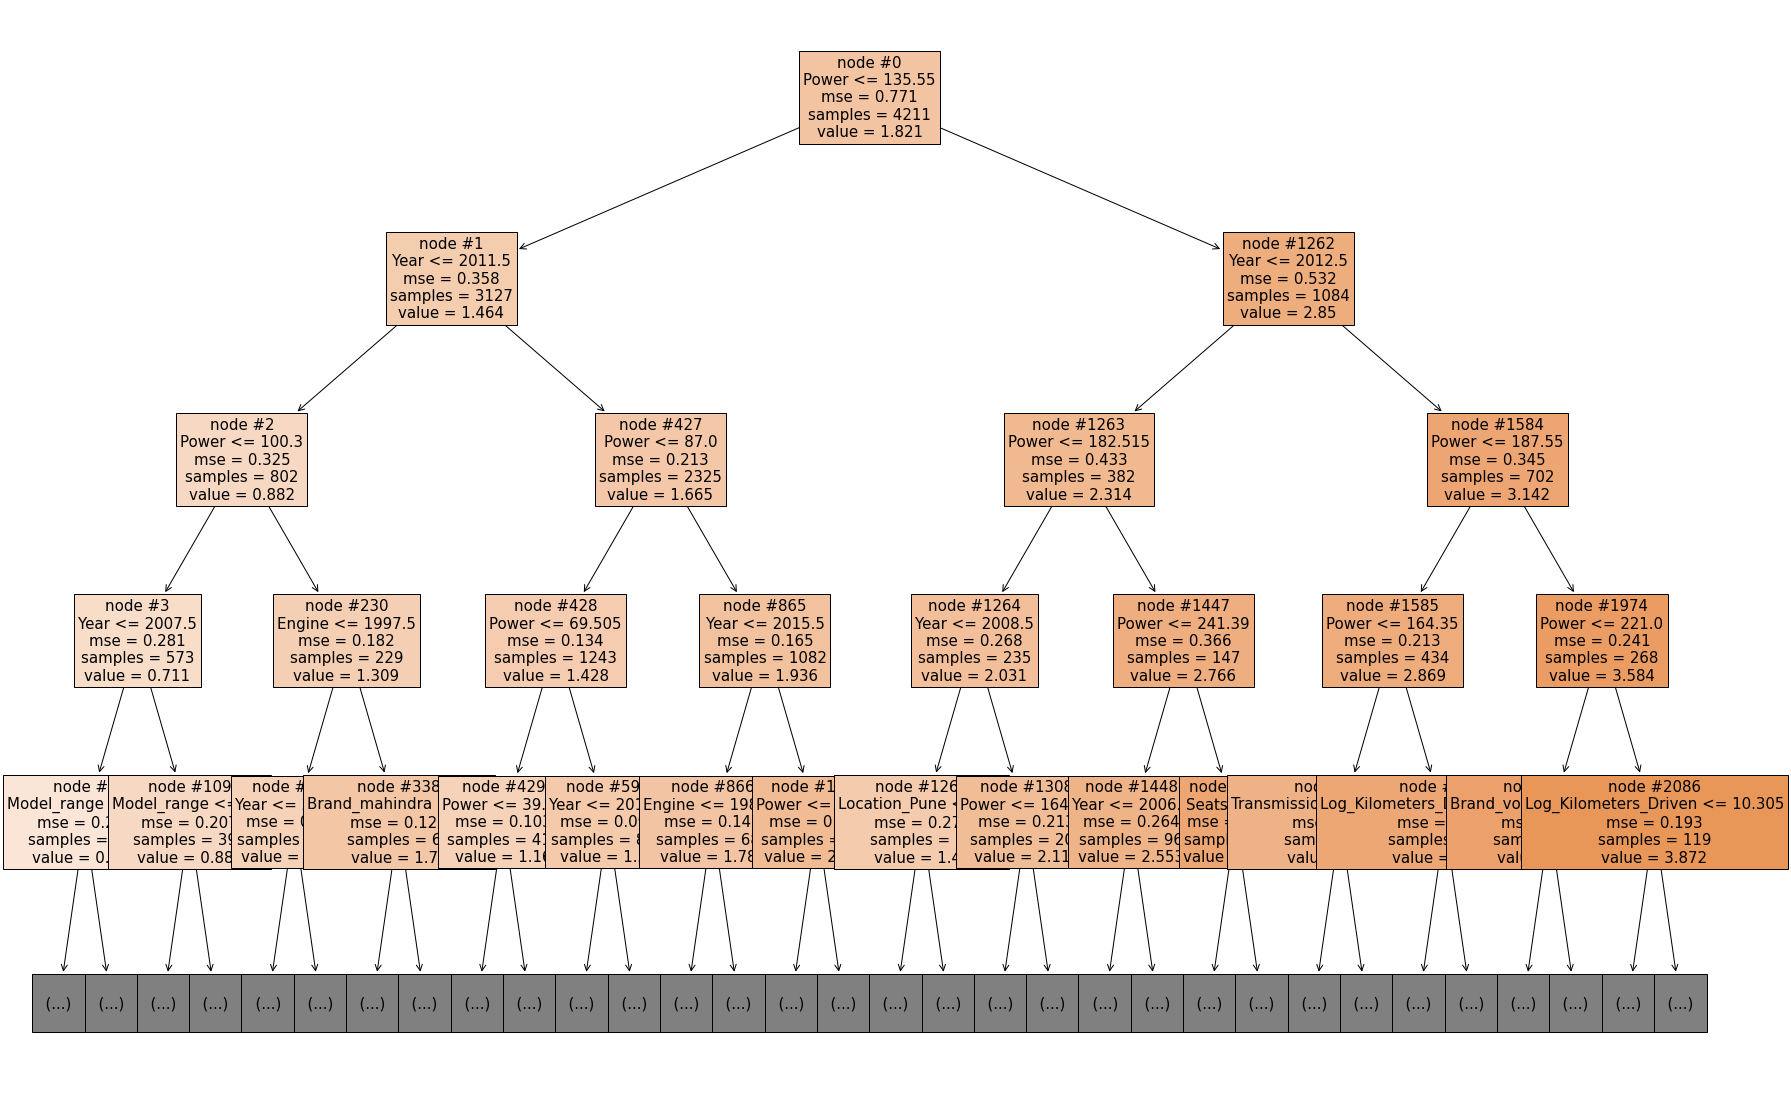

In [162]:
from sklearn import tree
plt.figure(figsize=(30,20))
tree.plot_tree(dtree_tuned, max_depth=4, feature_names=features, filled=True, fontsize=15, node_ids=True, class_names=True)
plt.show()

## 2.5 Random Forest Regressor

In [163]:
rf = RandomForestRegressor(random_state=1)

In [164]:
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=1)

In [165]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

In [166]:
y_pred = rf.predict(X_test)

In [167]:
score = rf.score(X_train, y_train)
print(score)

0.9909801240101128


In [168]:
get_model_score(rf, X_train, y_train)

MAE: 0.055
RMSE: 0.083
R2 score: 0.991


In [169]:
get_model_score(rf, X_test, y_test)

MAE: 0.144
RMSE: 0.206
R2 score: 0.943


In [170]:
score = cross_val_score(rf, X_train, y_train, cv =10)
print(score.mean())  

0.9335464985714996


In [171]:
prediction_importance = list(rf.feature_importances_)
input_importance = [(feature, importance) for feature, importance in zip(features, prediction_importance)]

                  Feature  Importance
0                   Power    0.623040
1                    Year    0.230256
2                  Engine    0.031120
3   Log_Kilometers_Driven    0.017225
4                 Mileage    0.012502
5        Location_Kolkata    0.004439
6          Brand_mahindra    0.004119
7              Brand_tata    0.004042
8     Transmission_Manual    0.003836
9         Brand_landrover    0.003754
10                  Seats    0.003674
11     Location_Hyderabad    0.003075
12            Model_range    0.002825
13            Brand_honda    0.002481
14    Location_Coimbatore    0.002285
15    Brand_mercedes-benz    0.002091
16             Brand_mini    0.001949
17       Fuel_Type_Diesel    0.001872
18              Brand_bmw    0.001669
19       Fuel_Type_Petrol    0.001658


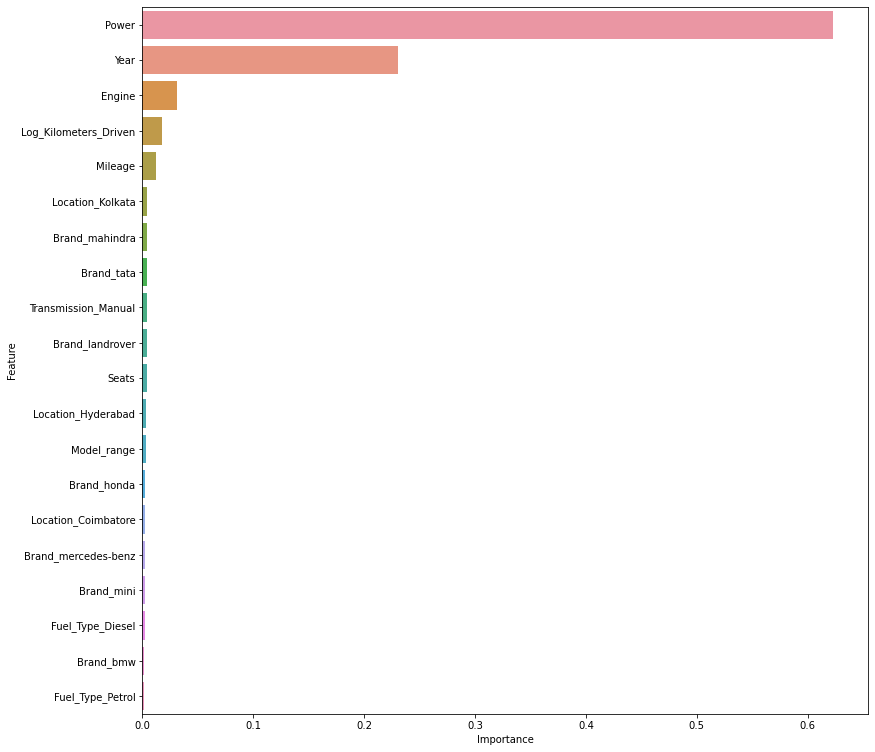

In [172]:
sorted_inputs = sorted(input_importance, key=lambda tup: tup[1], reverse=True)
plt.figure(figsize=(13,13))
importance_df = pd.DataFrame(sorted_inputs, columns = ["Feature", "Importance"])
sns.barplot(importance_df.Importance,importance_df.Feature.iloc[0:20])

print(pd.DataFrame(sorted_inputs, columns = ["Feature", "Importance"]).iloc[0:20])

In [173]:
importance_df[importance_df["Importance"]>0].Feature[:]

0                      Power
1                       Year
2                     Engine
3      Log_Kilometers_Driven
4                    Mileage
               ...          
251            Model_mustang
252            Model_classic
253           Model_sl-class
254          Model_nuvosport
255            Model_clubman
Name: Feature, Length: 256, dtype: object

In [174]:
rf_tuned = RandomForestRegressor(random_state=1, oob_score=True)
parameters = {'max_depth': [5, 7, None],
             'max_features': ['sqrt', 'log2'],
              'n_estimators' : [250, 500, 800, 900],             
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
gridCV = GridSearchCV(rf_tuned, parameters, scoring=scorer, cv=10)
gridCV = gridCV.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = gridCV.best_estimator_

# Fit the best algorithm to the data. 
rf_tuned.fit(X_train, y_train)

RandomForestRegressor(max_features='sqrt', n_estimators=900, oob_score=True,
                      random_state=1)

In [175]:
rf_tuned.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 900,
 'n_jobs': None,
 'oob_score': True,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

In [176]:
get_model_score(rf_tuned, X_train, y_train)

MAE: 0.055
RMSE: 0.081
R2 score: 0.991


In [177]:
get_model_score(rf_tuned, X_test, y_test)

MAE: 0.143
RMSE: 0.201
R2 score: 0.946


In [178]:
score = cross_val_score(rf_tuned, X_train, y_train, cv=10)
print(score.mean())  

0.9348740392332525


In [179]:
prediction_importance = list(rf.feature_importances_)
input_importance = [(feature, importance) for feature, importance in zip(features, prediction_importance)]

                  Feature  Importance
0                   Power    0.623040
1                    Year    0.230256
2                  Engine    0.031120
3   Log_Kilometers_Driven    0.017225
4                 Mileage    0.012502
5        Location_Kolkata    0.004439
6          Brand_mahindra    0.004119
7              Brand_tata    0.004042
8     Transmission_Manual    0.003836
9         Brand_landrover    0.003754
10                  Seats    0.003674
11     Location_Hyderabad    0.003075
12            Model_range    0.002825
13            Brand_honda    0.002481
14    Location_Coimbatore    0.002285
15    Brand_mercedes-benz    0.002091
16             Brand_mini    0.001949
17       Fuel_Type_Diesel    0.001872
18              Brand_bmw    0.001669
19       Fuel_Type_Petrol    0.001658


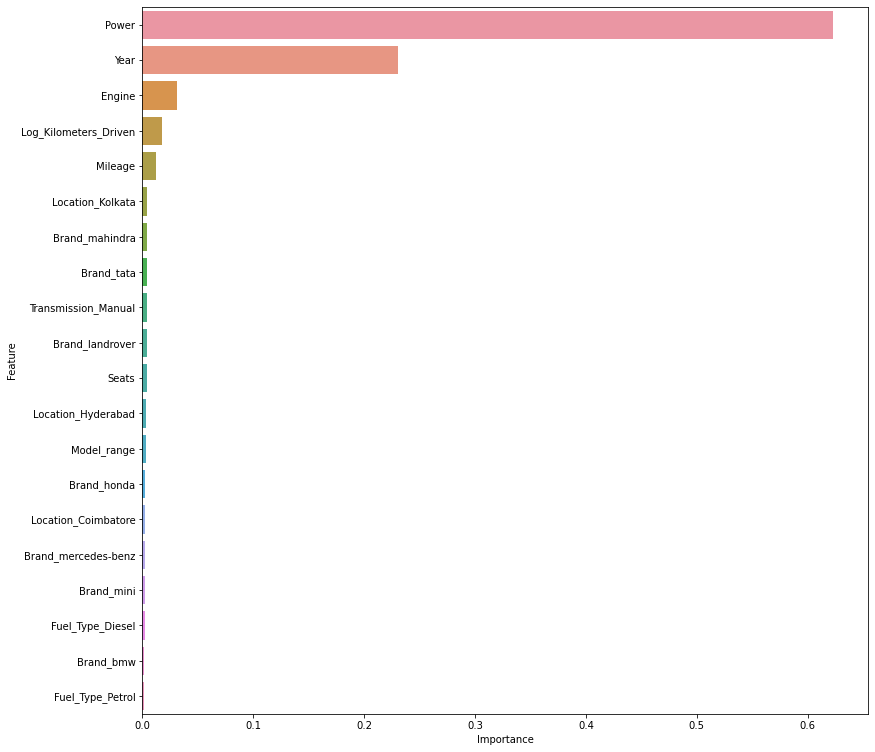

In [180]:
sorted_inputs = sorted(input_importance, key=lambda tup: tup[1], reverse=True)
plt.figure(figsize=(13,13))
importance_df = pd.DataFrame(sorted_inputs, columns = ["Feature", "Importance"])
sns.barplot(importance_df.Importance,importance_df.Feature.iloc[0:20])

print(pd.DataFrame(sorted_inputs, columns = ["Feature", "Importance"]).iloc[0:20])

In [181]:
importance_df[importance_df["Importance"]>0].Feature[:]

0                      Power
1                       Year
2                     Engine
3      Log_Kilometers_Driven
4                    Mileage
               ...          
251            Model_mustang
252            Model_classic
253           Model_sl-class
254          Model_nuvosport
255            Model_clubman
Name: Feature, Length: 256, dtype: object

## Conclusion
- Best Overall Model: The best overall model was the tuned random forest, as it had the best overall performance on the test data and did well on the training data as well. The model rf_tuned also had a cross validation score of R2 of 0.935. 

- Common Features: All models in this study included the following four:
1.	Year
2.	Power
3.	Mileage
4.	Log_Kilometers_Driven

- There needs to be more data collected in order to build better models. This is to reduce brands and model names which have low counts. Also, while this study removed the feature New_Price due to the absence of a large proportion of its values, these data points should be collected and added to the existing data set for it to be complete. The same should be done for Price, which had more than 1000 missing values.
- The linear regression model can be further refined by performing additional hyperparameter tuning such as performing GridSearchCV to determine the optimal number of features. In addition, the brand and model names which only have a count of 1 can be removed to explore how the model performs. The random forest and decision tree models can also be further refined with hyperparameter tuning.
- The study revealed issues with the dataset, particularly the handling of the feature name. The first issue is the requirement to perform feature engineering such as splitting the brand names from the model names, which requires a data engineer to check through and validate the correctness of each brand name. The second issue is If data is keyed in manually, data validation methods such as drop-down lists may help to avoid errors.